<a href="https://colab.research.google.com/github/AbhigyanSingh97/Loan-defaulters-prediction/blob/master/Loan_defaulters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [225]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [0]:
data = pd.read_csv('/content/drive/My Drive/data/XYZCorp_LendingData.csv')

In [0]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                #if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                #    df[col] = df[col].astype(np.float16)
                #el
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        #else:
            #df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [229]:
data = reduce_mem_usage(data)

Memory usage of dataframe is 476.73 MB --> 288.16 MB (Decreased by 39.6%)


In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           855969 non-null  int32  
 1   member_id                    855969 non-null  int32  
 2   loan_amnt                    855969 non-null  int32  
 3   funded_amnt                  855969 non-null  int32  
 4   funded_amnt_inv              855969 non-null  float32
 5   term                         855969 non-null  object 
 6   int_rate                     855969 non-null  float32
 7   installment                  855969 non-null  float32
 8   grade                        855969 non-null  object 
 9   sub_grade                    855969 non-null  object 
 10  emp_title                    806526 non-null  object 
 11  emp_length                   812908 non-null  object 
 12  home_ownership               855969 non-null  object 
 13 

In [0]:
def check_missing_data(df):
    flag=df.isna().sum().any()
    if flag==True:
        total = df.isnull().sum()
        percent = ((df.isnull().sum())/len(df))*100
        output = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        data_type = []
        for col in df.columns:
            dtype = str(df[col].dtype)
            data_type.append(dtype)
        output['Types'] = data_type
        return(np.transpose(output))
    else:
        return(False)

In [232]:
check_missing_data(data)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
Total,0,0,0,0,0,0,0,0,0,0,49443,43061,0,0,0,0,0,734157,0,33,0,0,0,0,0,0,439812,724785,0,0,0,446,0,0,0,0,0,0,0,0,0,0,0,8862,0,252971,50,56,642830,0,0,855527,855529,855527,0,67313,67313,842681,842681,842681,842681,843035,842681,844360,842681,842681,842681,842681,67313,842681,842681,842681,0
Percent,0,0,0,0,0,0,0,0,0,0,5.77626,5.03067,0,0,0,0,0,85.7691,0,0.00385528,0,0,0,0,0,0,51.3818,84.6742,0,0,0,0.0521047,0,0,0,0,0,0,0,0,0,0,0,1.03532,0,29.5538,0.00584133,0.00654229,75.0997,0,0,99.9484,99.9486,99.9484,0,7.86395,7.86395,98.4476,98.4476,98.4476,98.4476,98.489,98.4476,98.6438,98.4476,98.4476,98.4476,98.4476,7.86395,98.4476,98.4476,98.4476,0
Types,int32,int32,int32,int32,float32,object,float32,float32,object,object,object,object,object,float32,object,object,object,object,object,object,object,object,float32,int8,object,int8,float32,float32,int8,int8,int32,float32,int16,object,float32,float32,float32,float32,float32,float32,float32,float32,float32,object,float32,object,object,float32,float32,int8,object,float32,float32,object,int8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int8


In [0]:
data1 = data.copy()

In [234]:
data1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.869995,B,B2,NaN,10+ years,RENT,24000.0,Verified,01-12-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.650000,0,01-01-1985,1,NaN,NaN,3,0,13648,83.699997,9,f,0.000000,0.000000,5861.071289,5831.779785,5000.000000,861.070007,0.000000,0.000000,0.00,01-01-2015,171.619995,NaN,01-01-2016,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.830002,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,01-12-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.000000,0,01-04-1999,5,NaN,NaN,3,0,1687,9.400000,4,f,0.000000,0.000000,1008.710022,1008.710022,456.459991,435.170013,0.000000,117.080002,1.11,01-04-2013,119.660004,NaN,01-09-2013,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.330002,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,01-12-2011,n,NaN,small_business,real estate business,606xx,IL,8.720000,0,01-11-2001,2,NaN,NaN,2,0,2956,98.500000,10,f,0.000000,0.000000,3003.653564,3003.649902,2400.000000,603.650024,0.000000,0.000000,0.00,01-06-2014,649.909973,NaN,01-01-2016,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.309998,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,01-12-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.000000,0,01-02-1996,1,35.0,NaN,10,0,5598,21.000000,37,f,0.000000,0.000000,12226.301758,12226.299805,10000.000000,2209.330078,16.969999,0.000000,0.00,01-01-2015,357.480011,NaN,01-01-2015,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.790001,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,01-12-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.940001,0,01-01-1996,0,38.0,NaN,15,0,27783,53.900002,38,f,766.900024,766.900024,3242.169922,3242.169922,2233.100098,1009.070007,0.000000,0.000000,0.00,01-01-2016,67.790001,01-02-2016,01-01-2016,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [0]:
data1['emp_length'].replace(to_replace = '10+ years',value = 10,inplace = True)
data1['emp_length'].replace(to_replace = '9 years',value = 9,inplace = True)
data1['emp_length'].replace(to_replace = '8 years',value = 8,inplace = True)
data1['emp_length'].replace(to_replace = '7 years',value = 7,inplace = True)
data1['emp_length'].replace(to_replace = '6 years',value = 6,inplace = True)
data1['emp_length'].replace(to_replace = '5 years',value = 5,inplace = True)
data1['emp_length'].replace(to_replace = '4 years',value = 4,inplace = True)
data1['emp_length'].replace(to_replace = '3 years',value = 3,inplace = True)
data1['emp_length'].replace(to_replace = '2 years',value = 2,inplace = True)
data1['emp_length'].replace(to_replace = '1 year',value = 1,inplace = True)
data1['emp_length'].replace(to_replace = '< 1 year',value = 0,inplace = True)

# Visualising data

In [0]:
data1['emp_length'] = data1['emp_length'].astype(object)

In [237]:
data1['emp_length'].dtypes

dtype('O')

In [0]:
data_num = data1.select_dtypes(exclude = object)

In [0]:
data_num.drop(['id','member_id'],axis=1,inplace=True)

In [240]:
cols = data_num.drop('default_ind',axis=1).columns
cols.nunique()

49

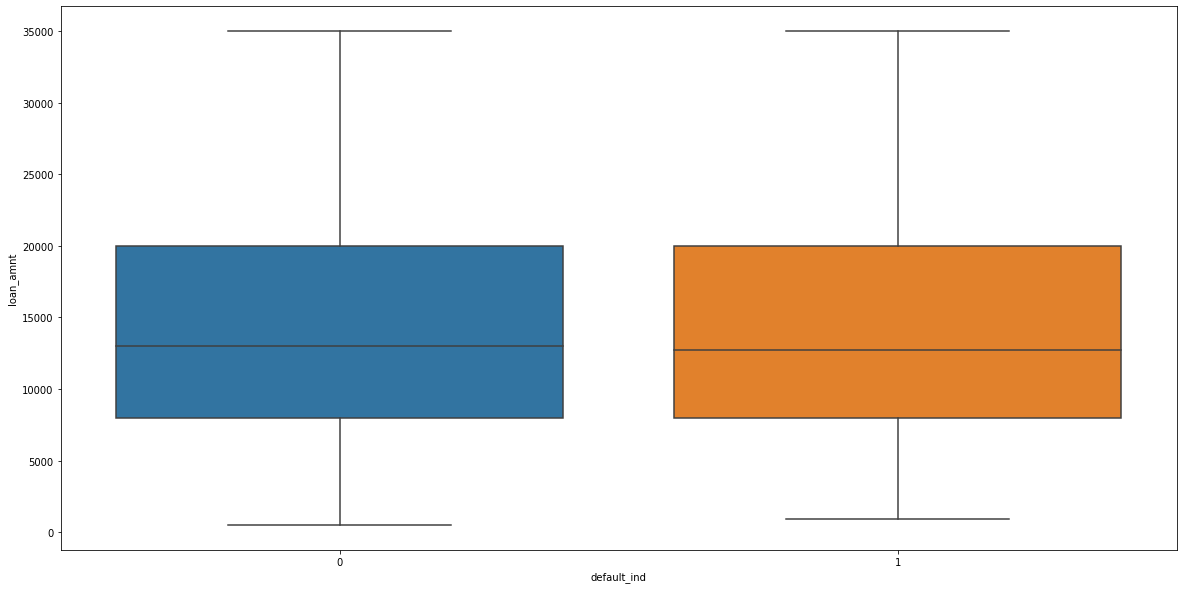

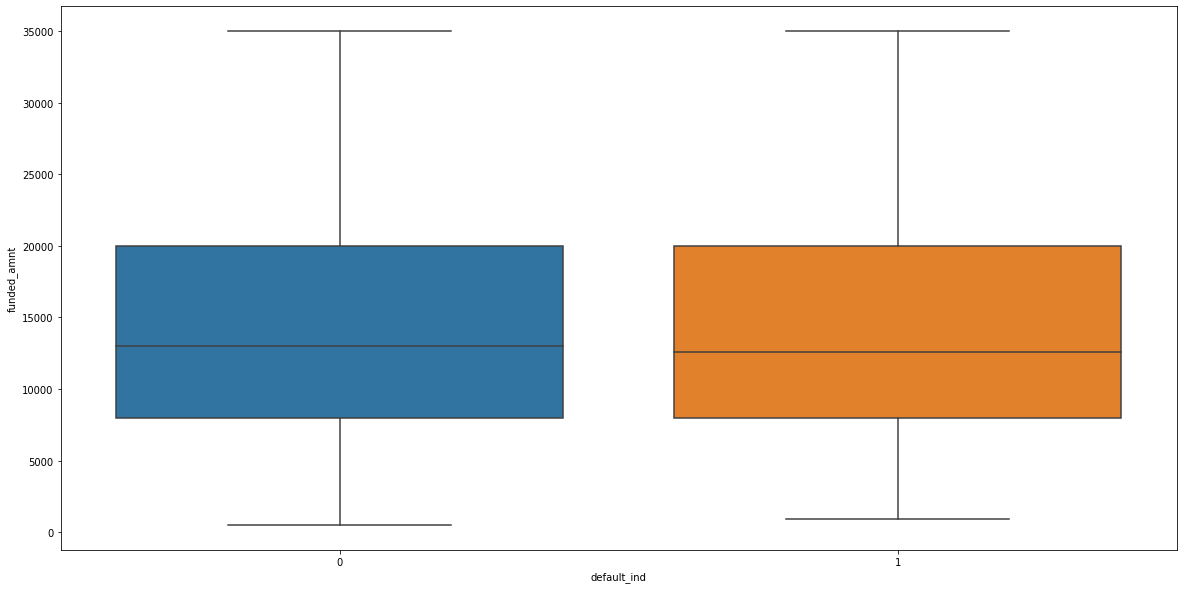

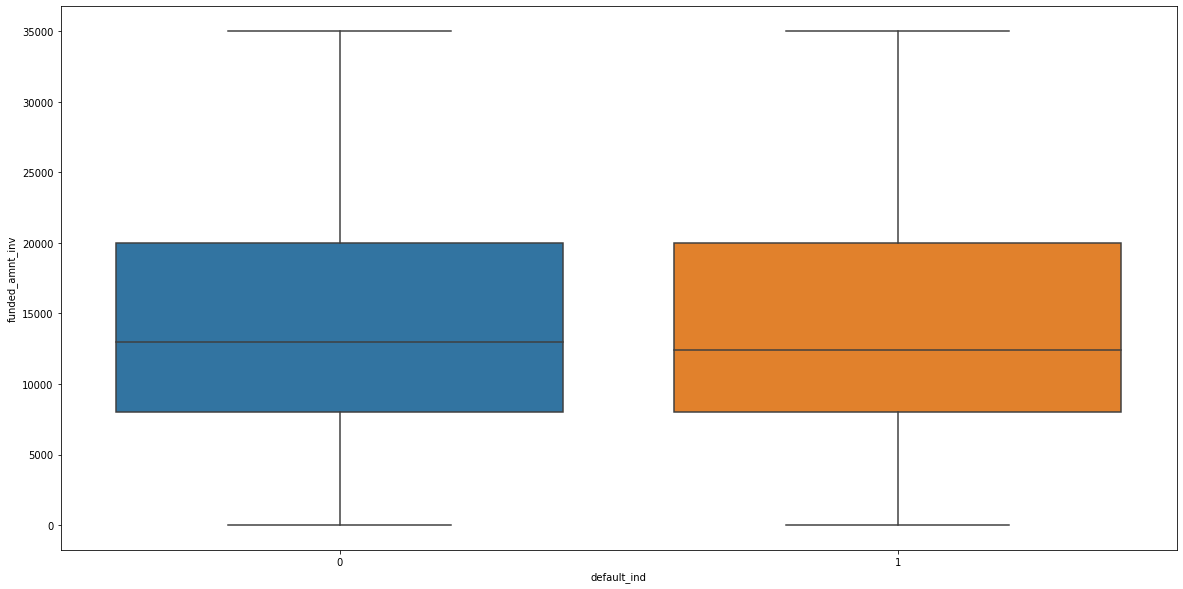

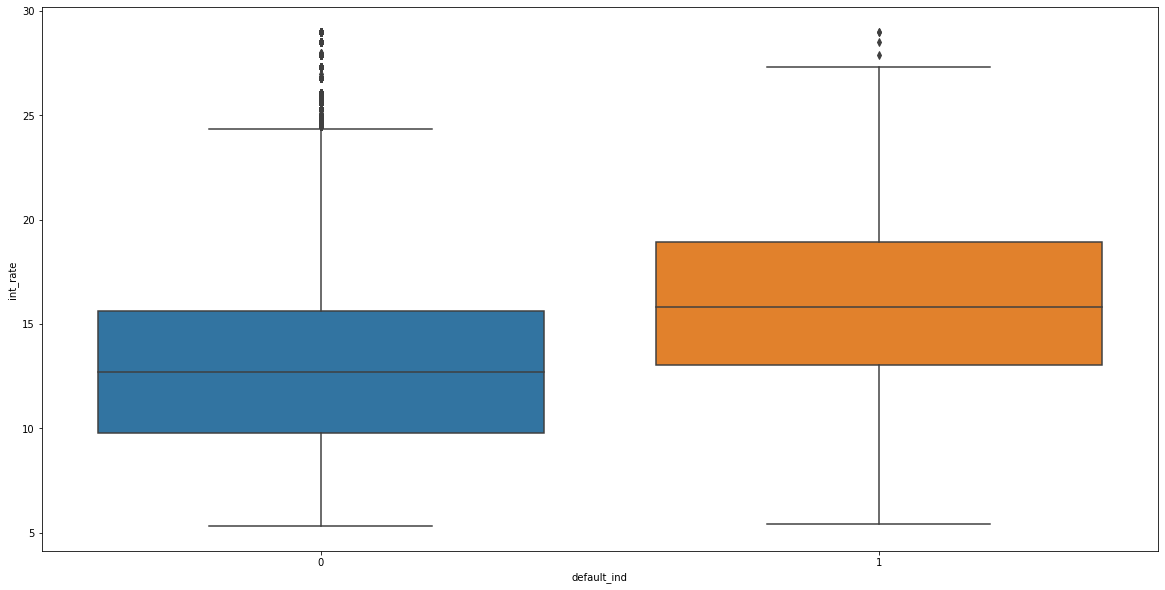

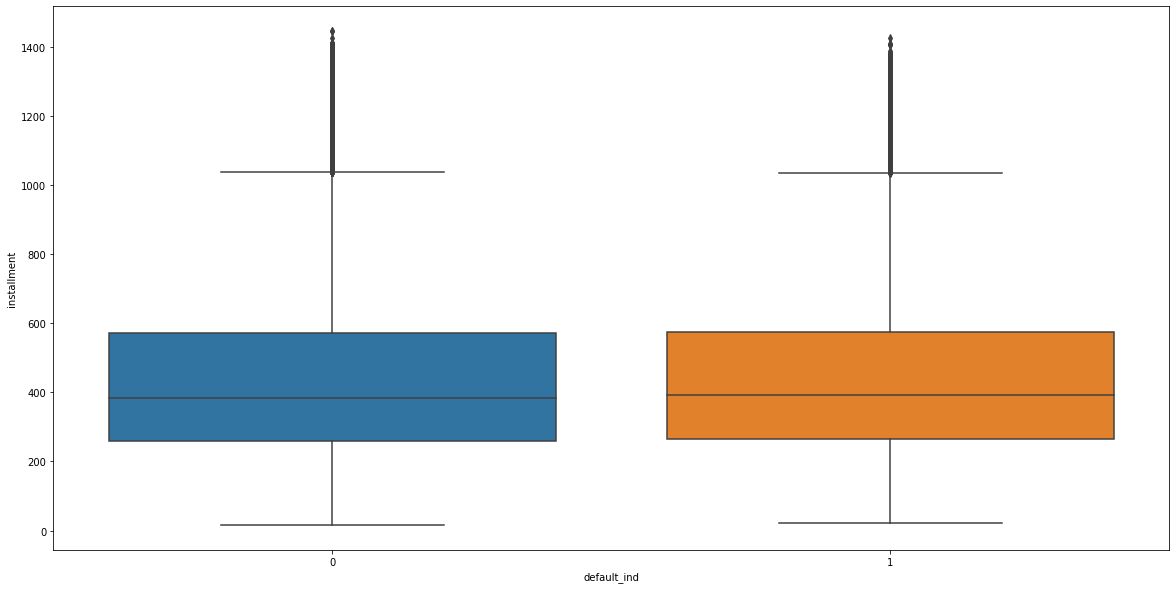

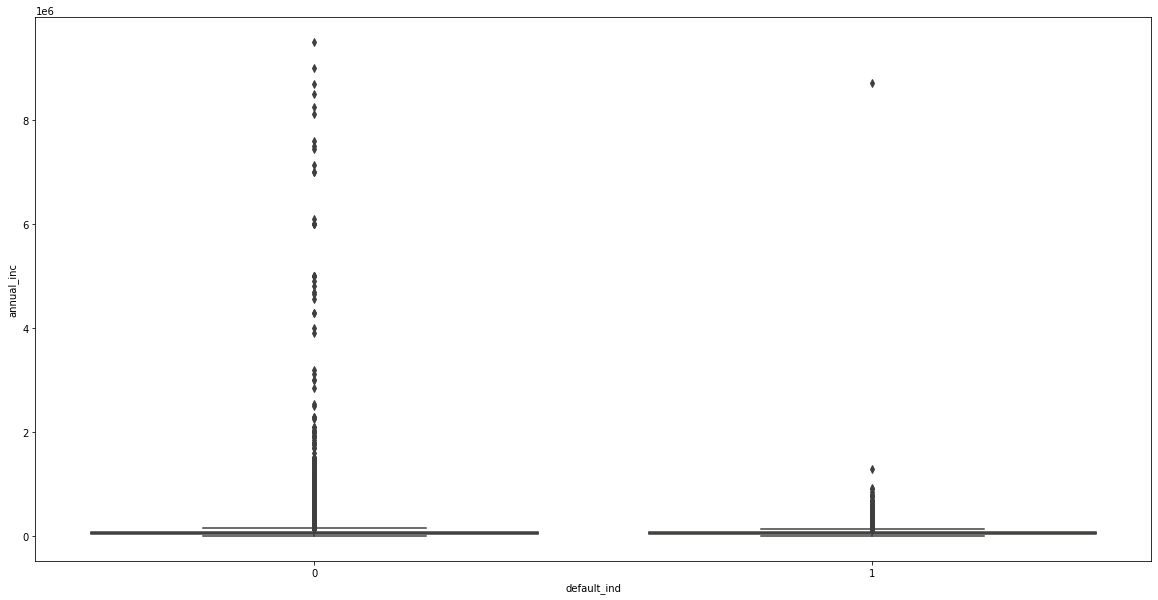

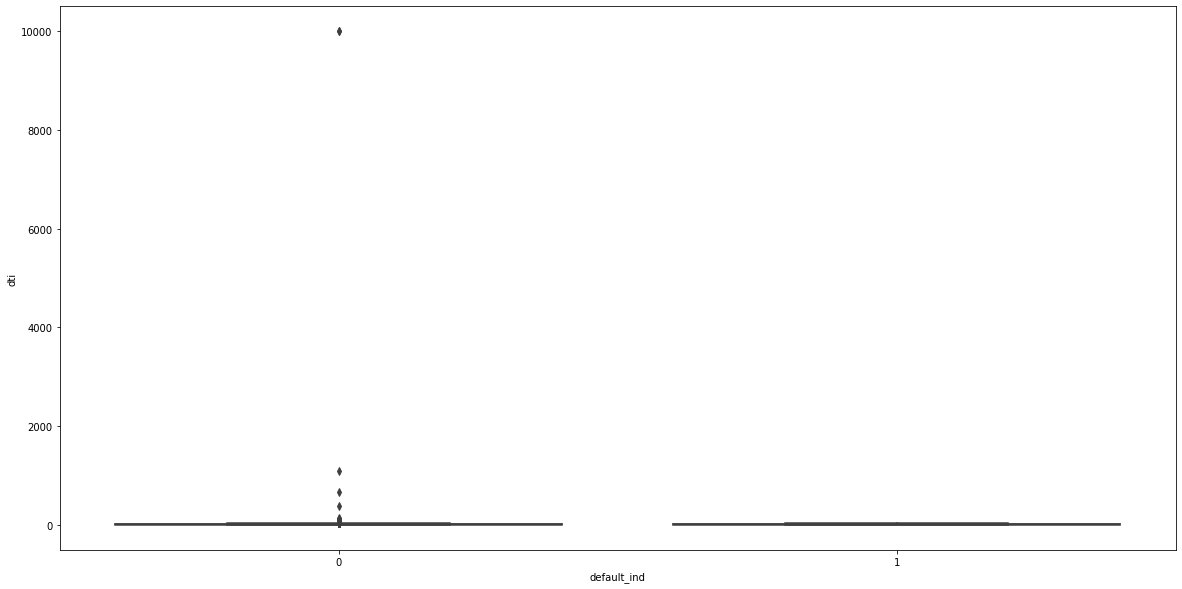

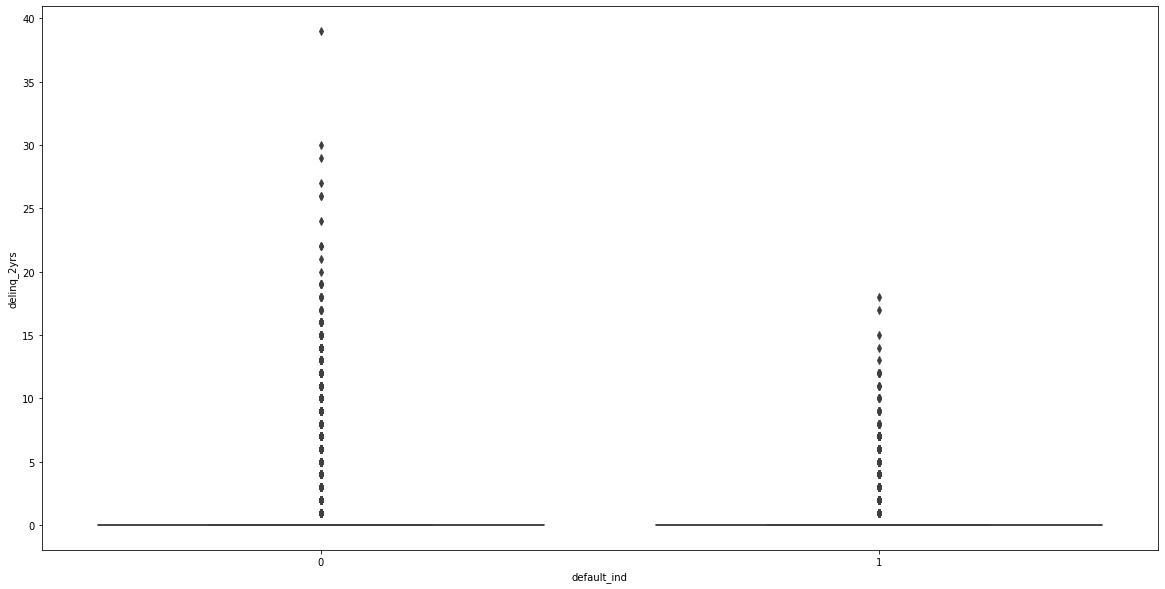

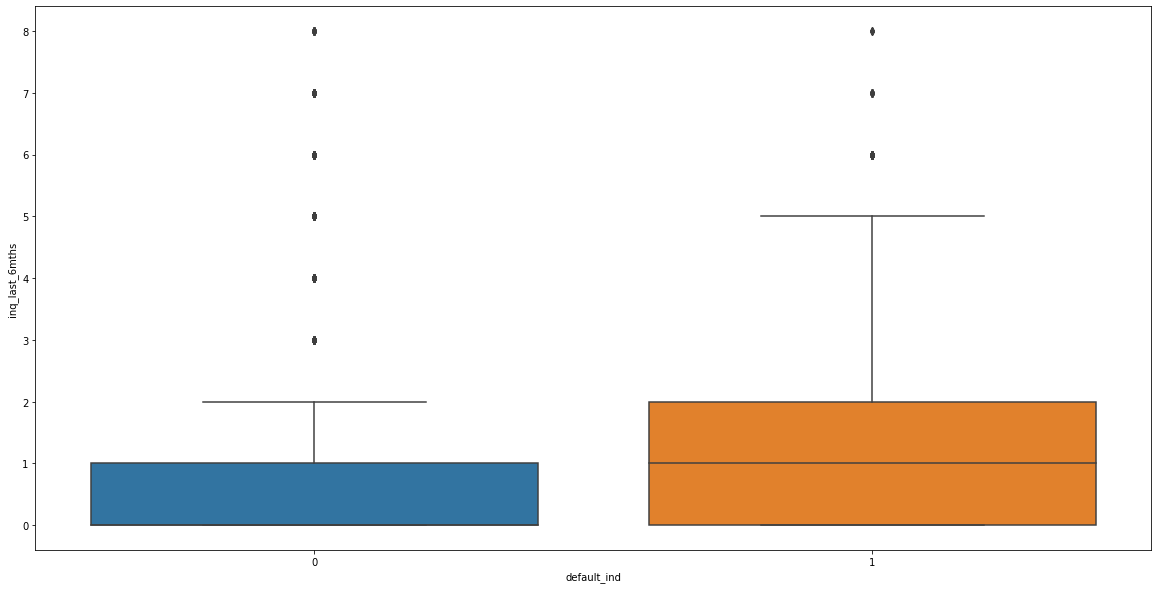

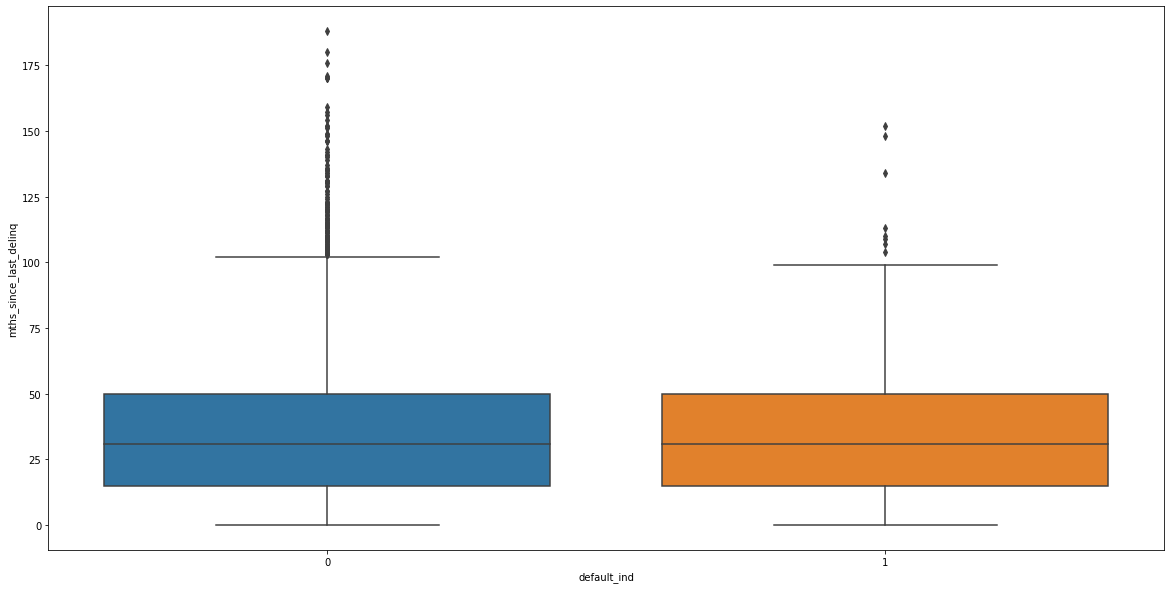

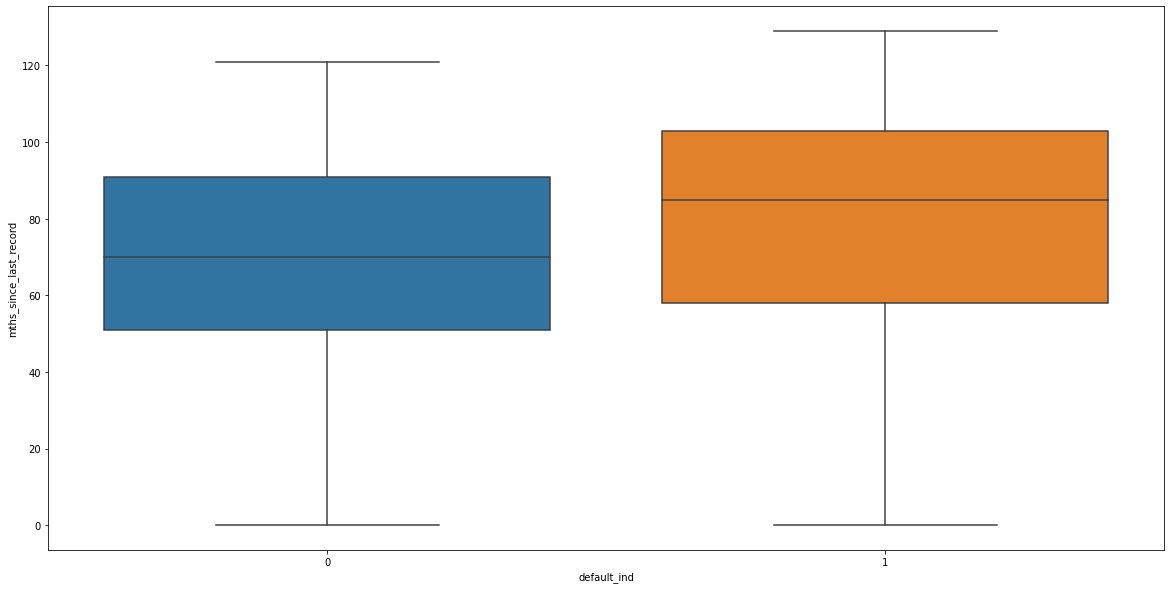

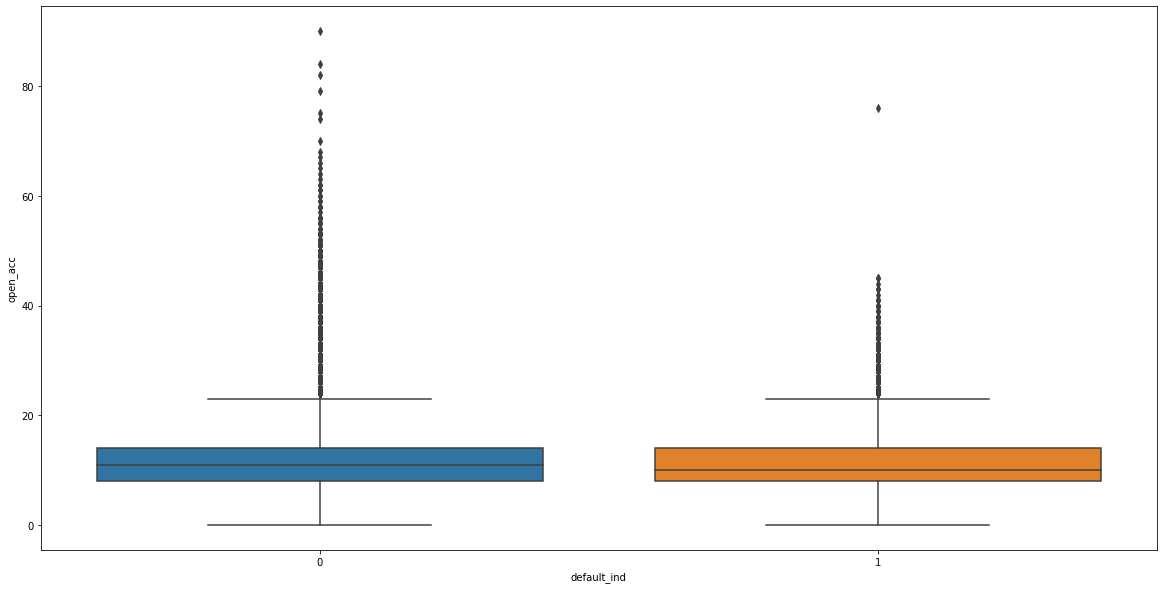

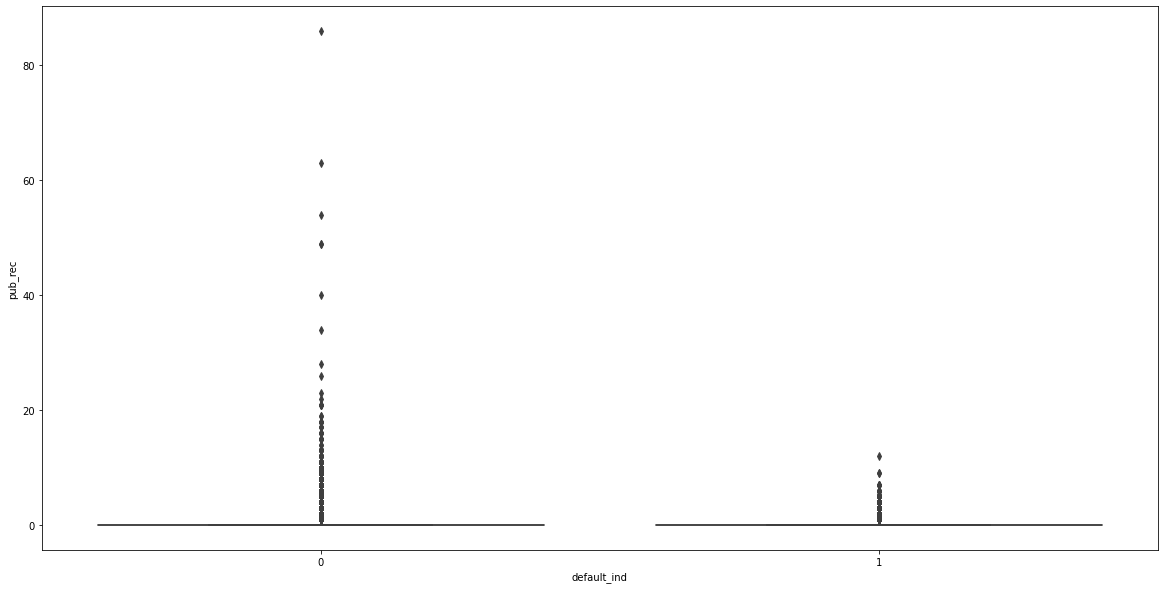

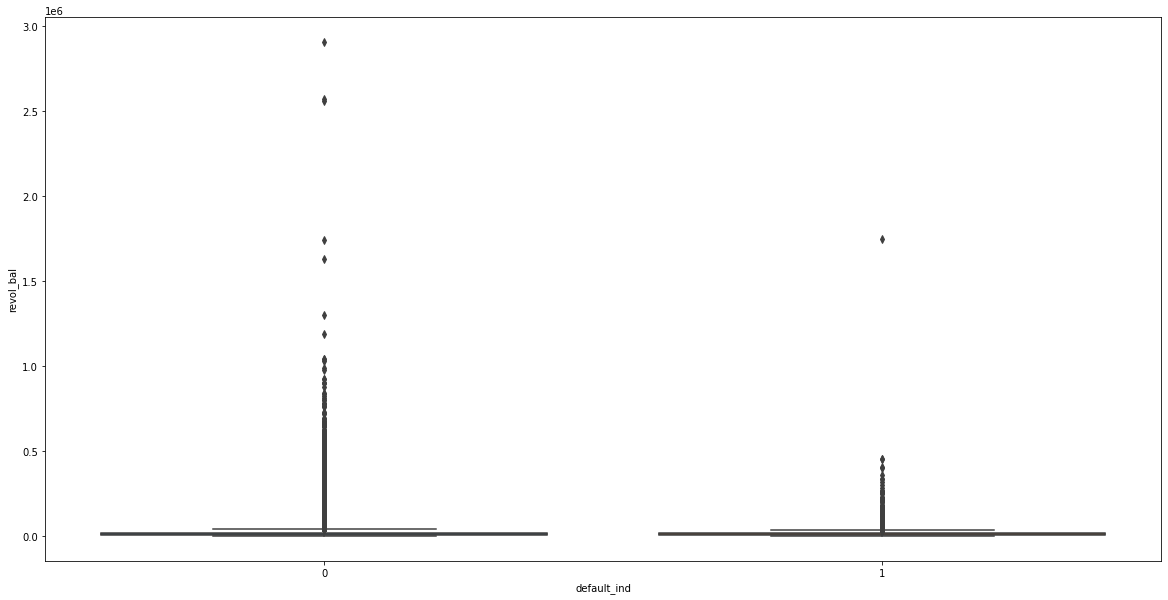

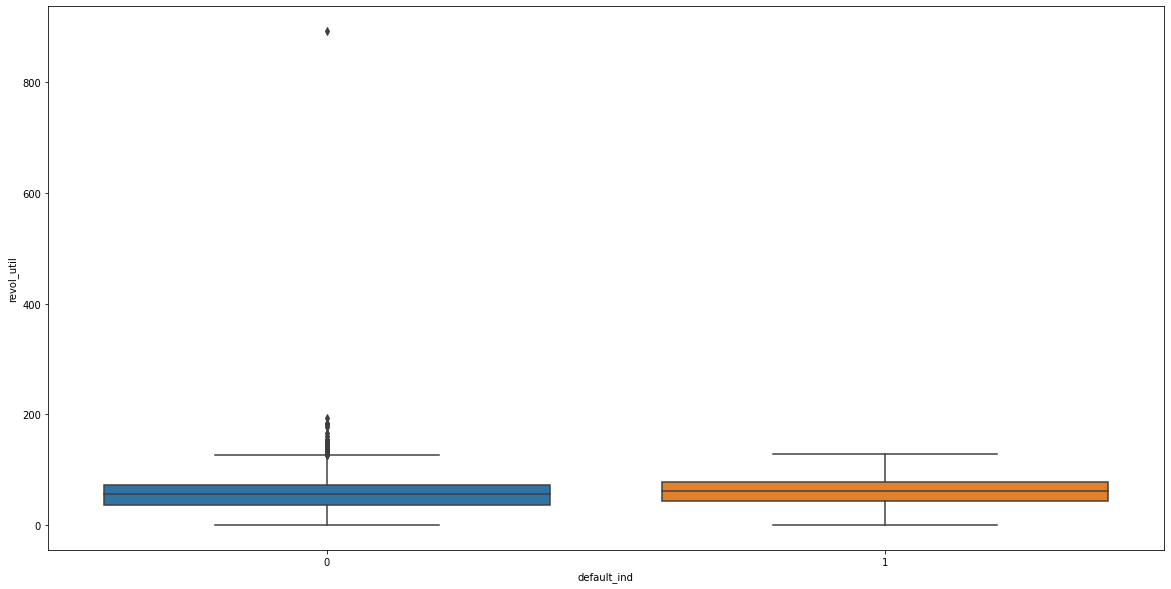

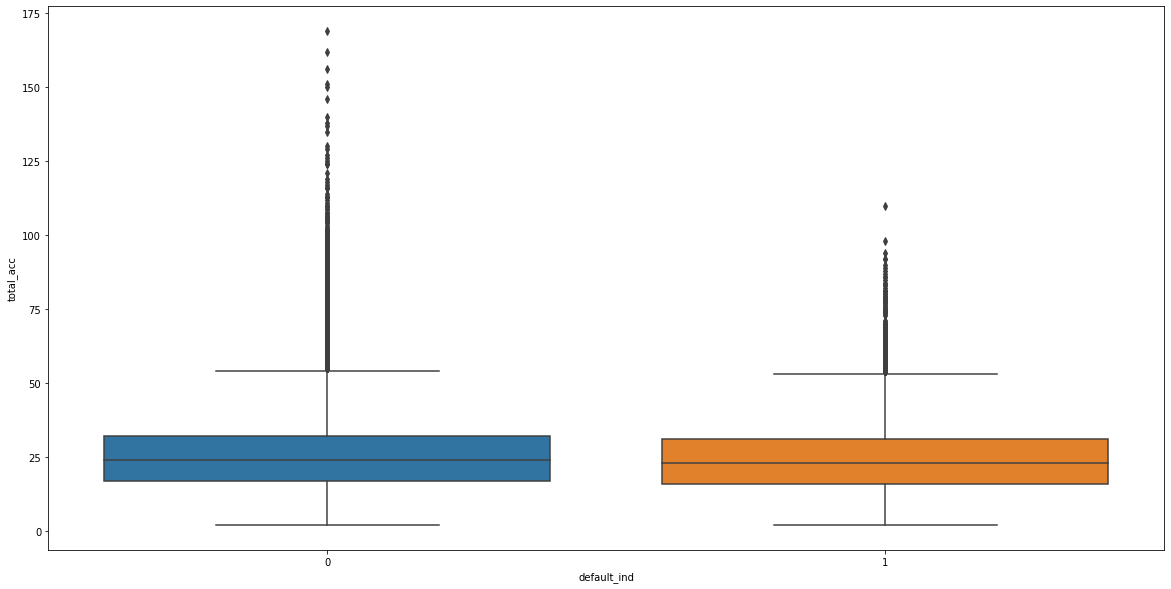

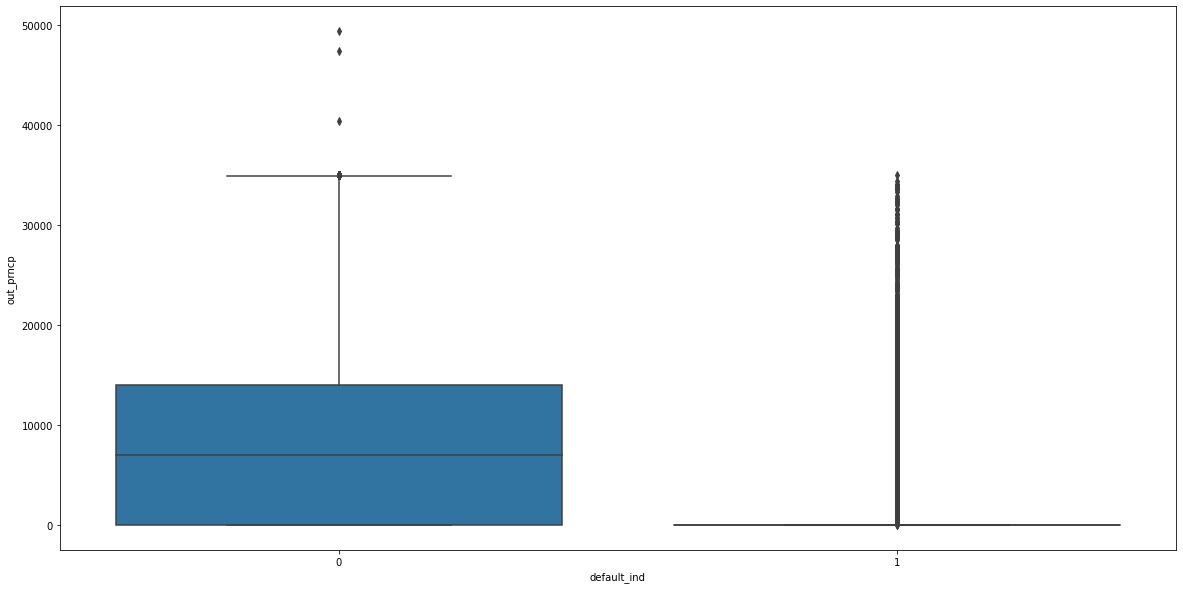

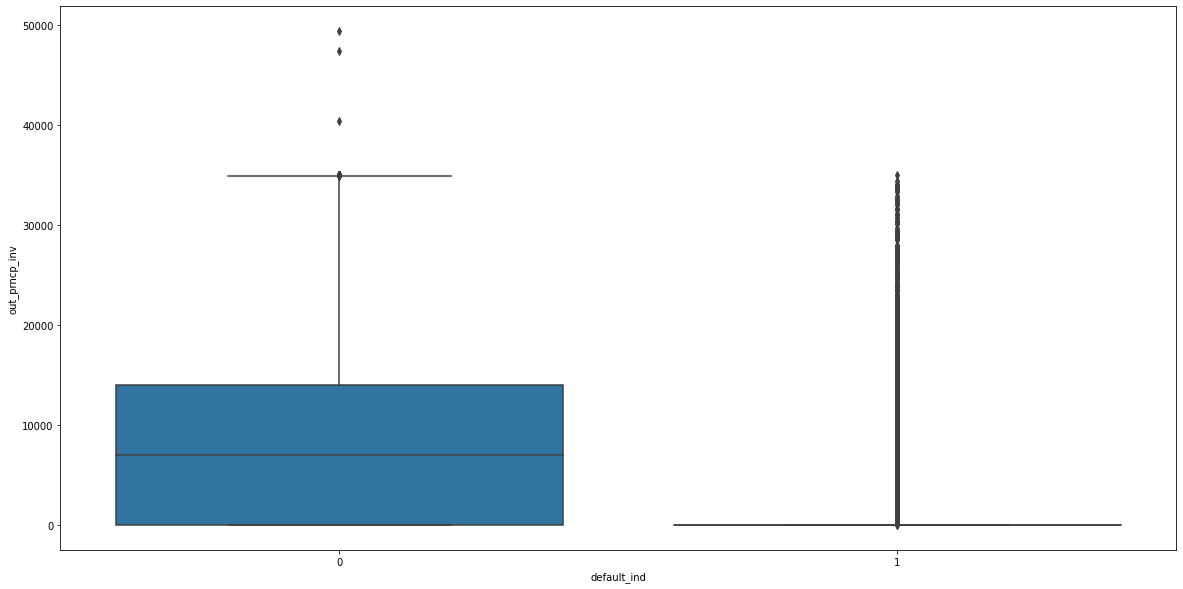

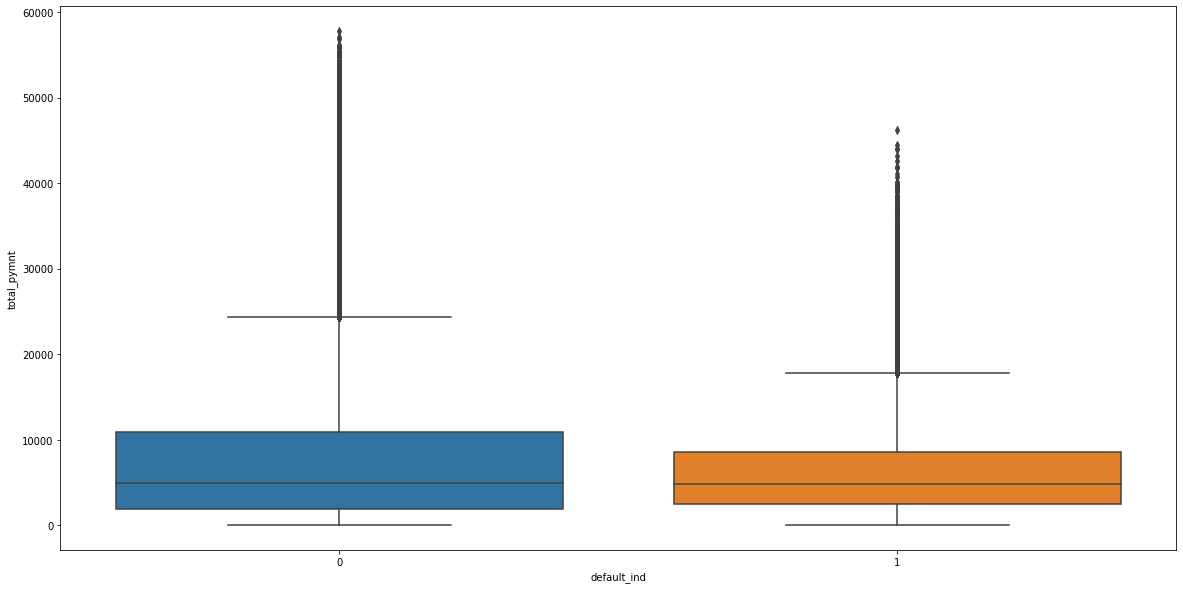

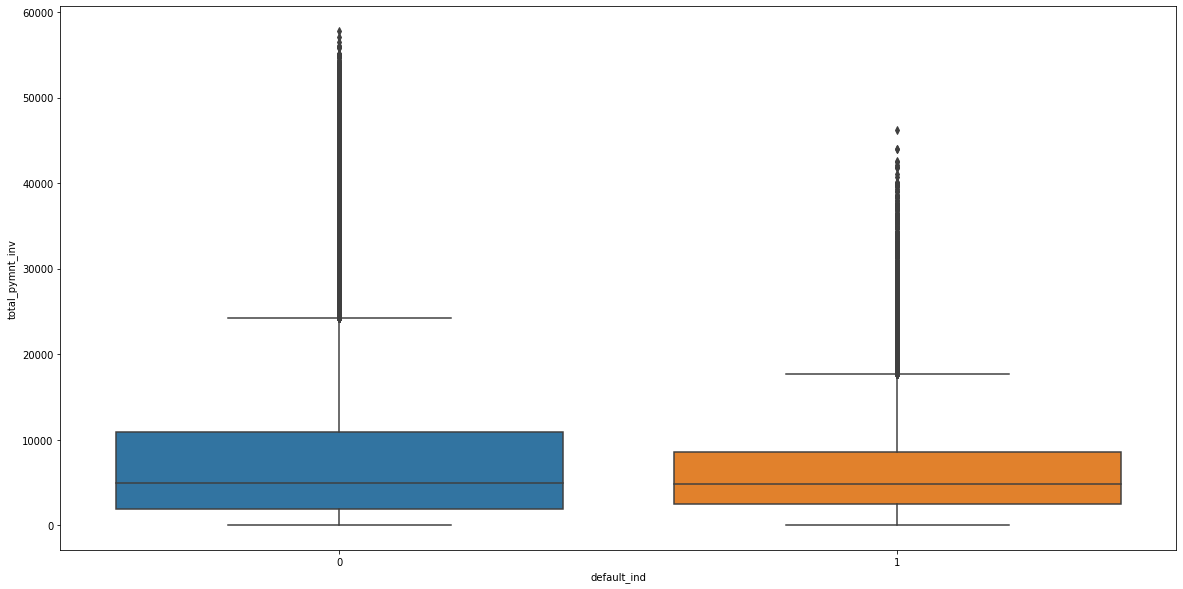

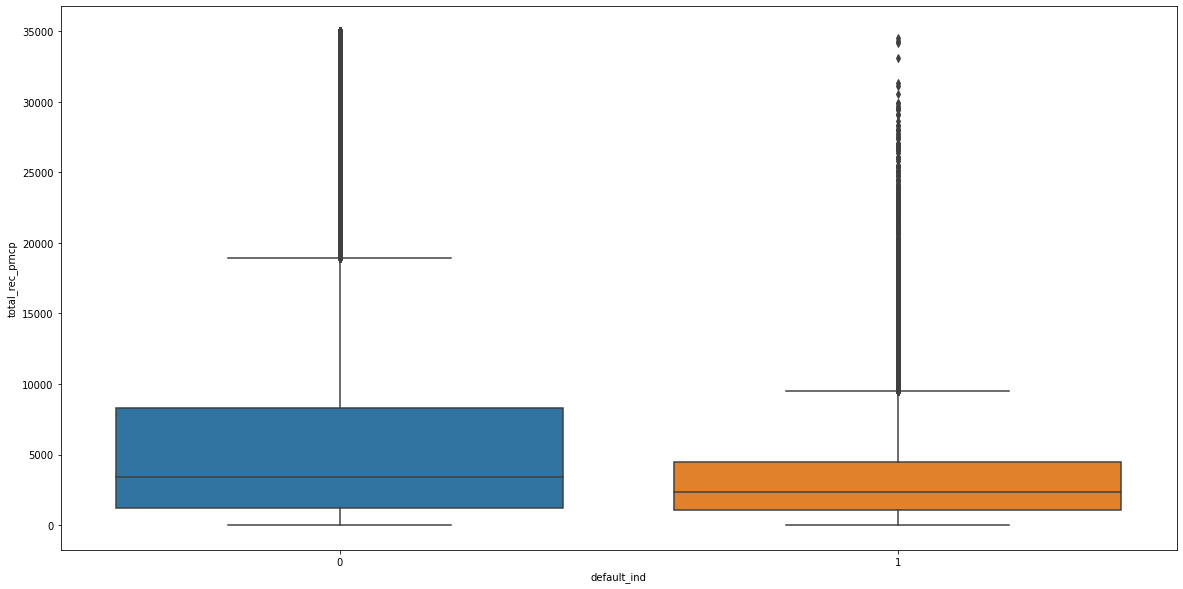

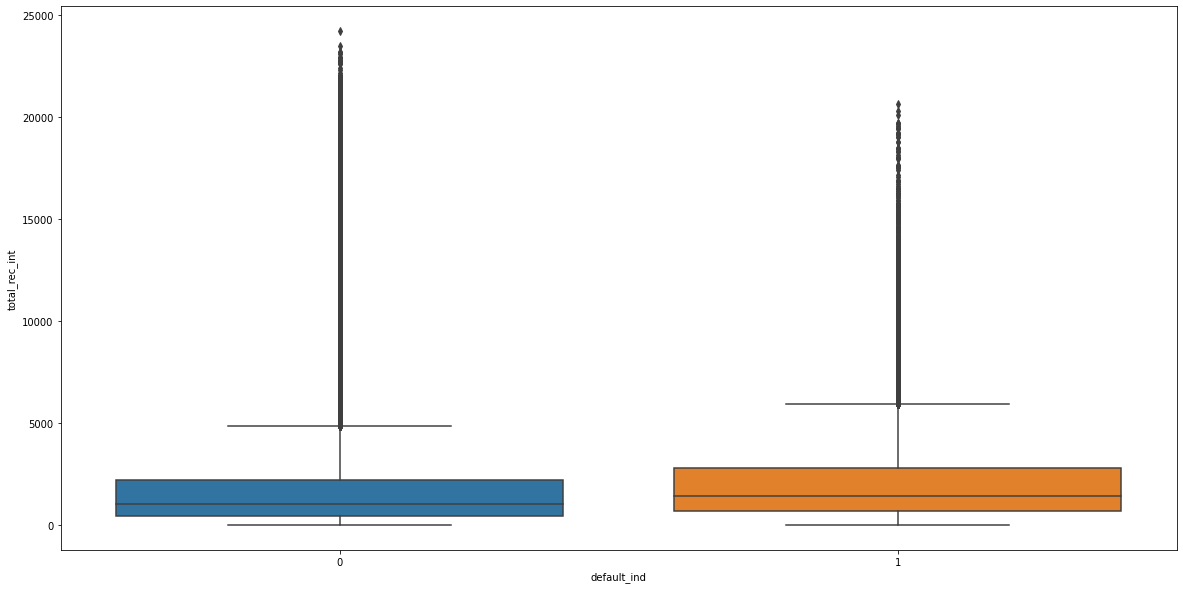

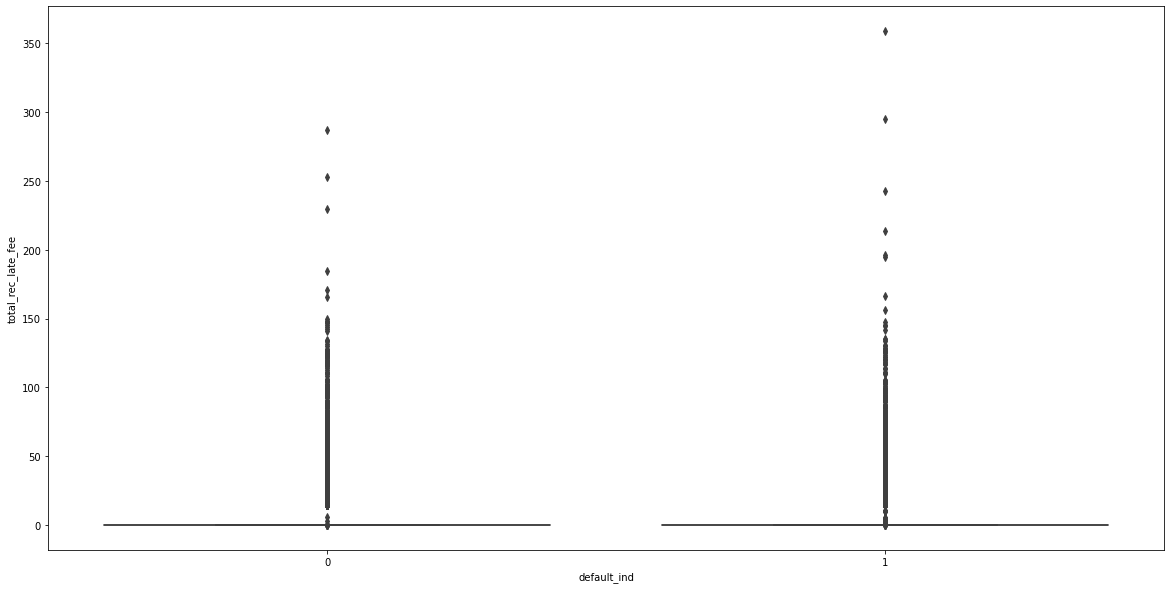

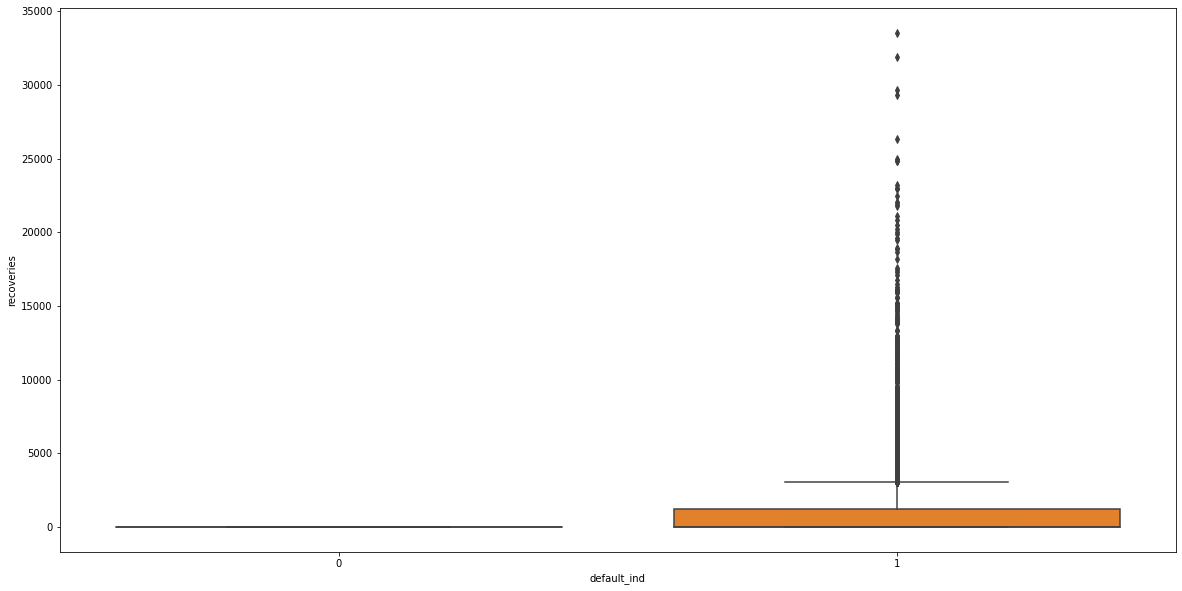

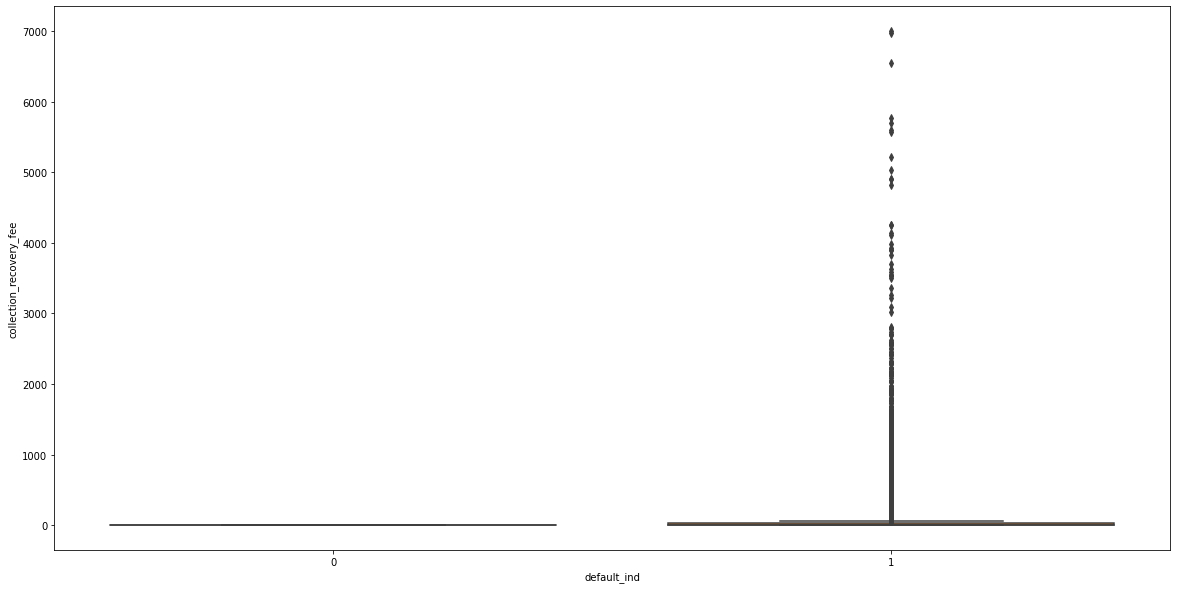

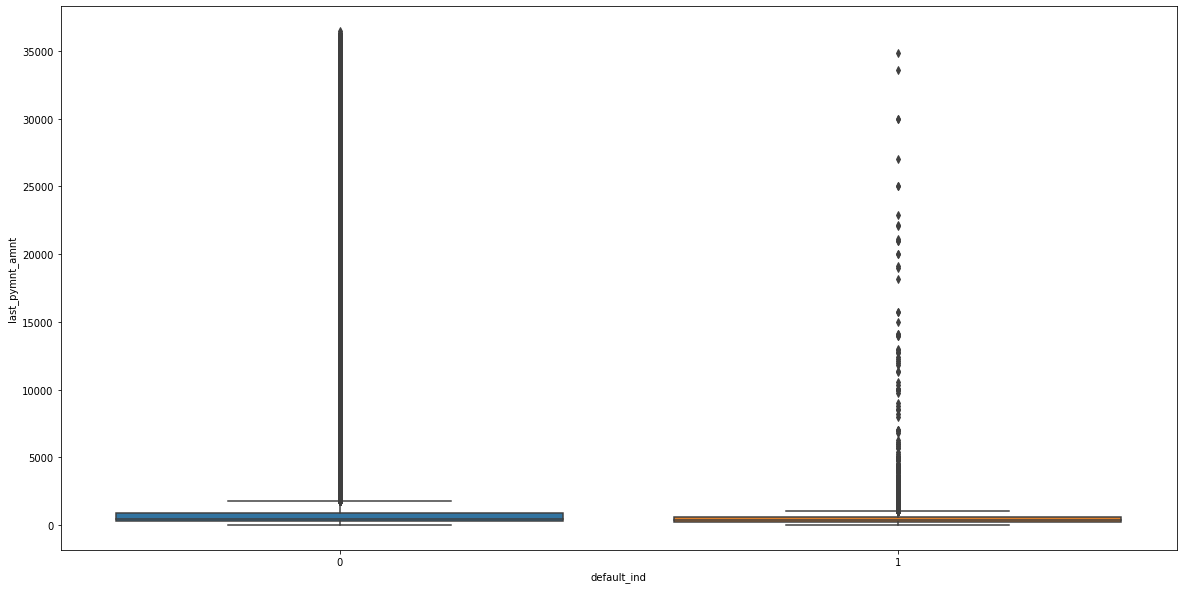

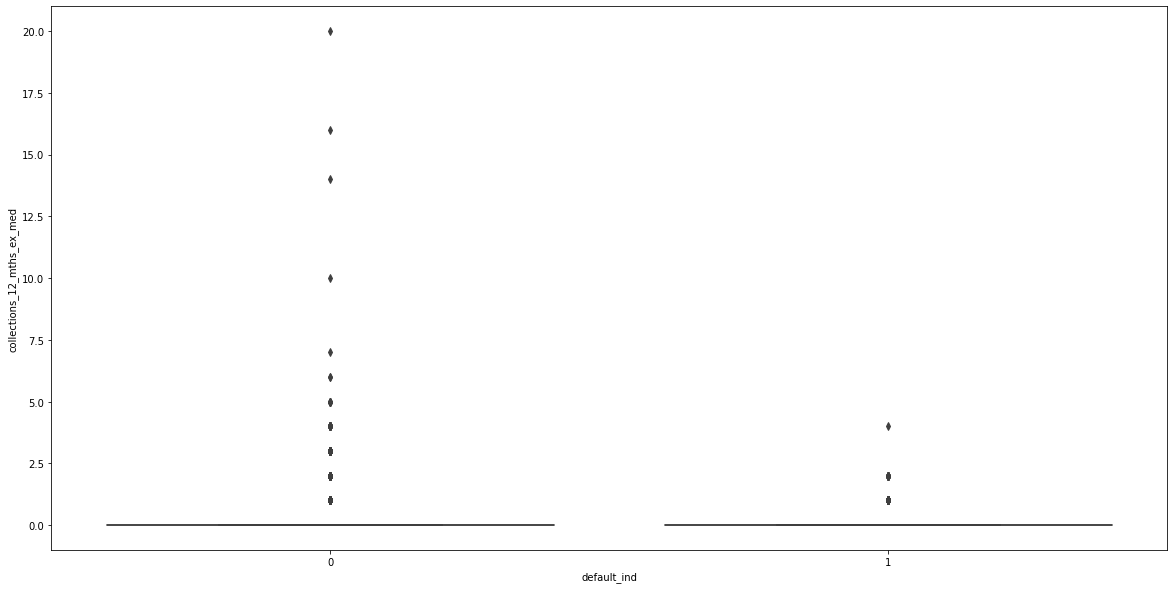

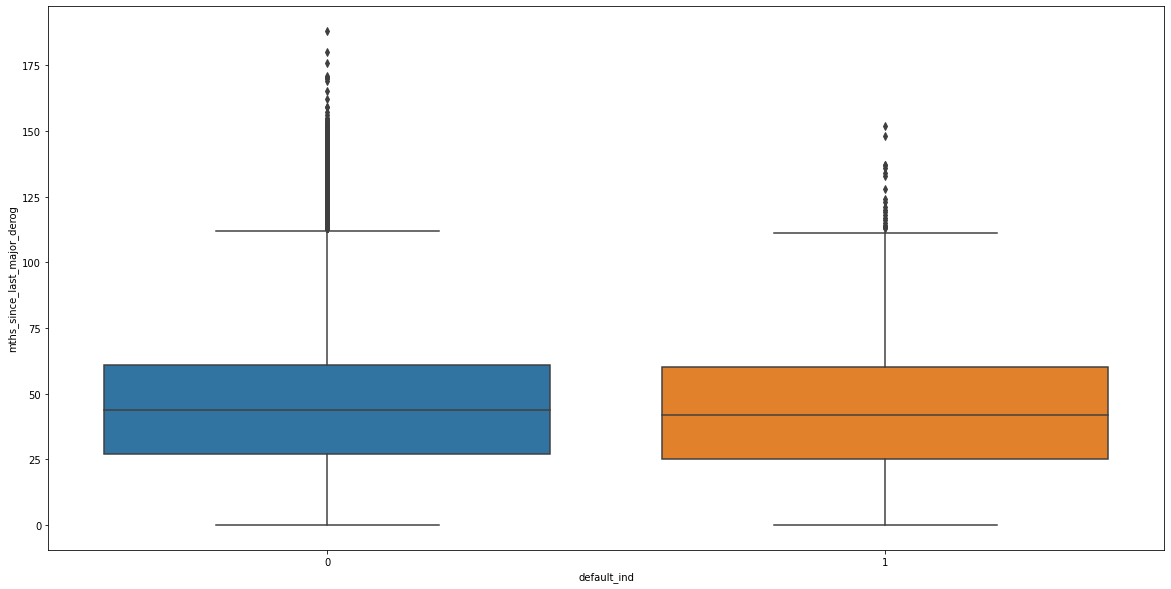

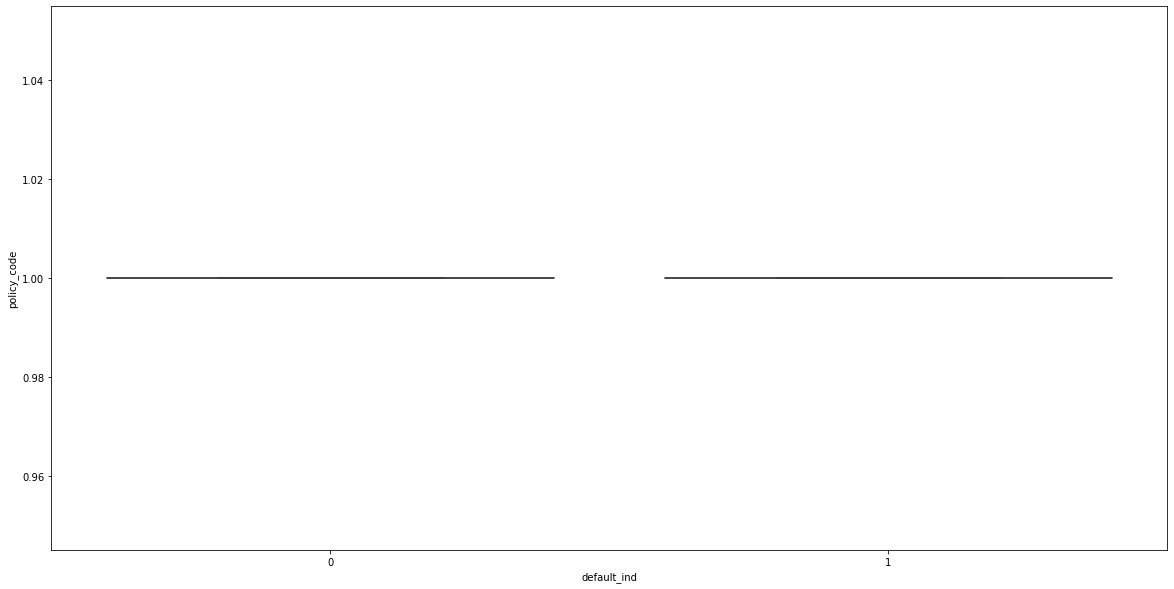

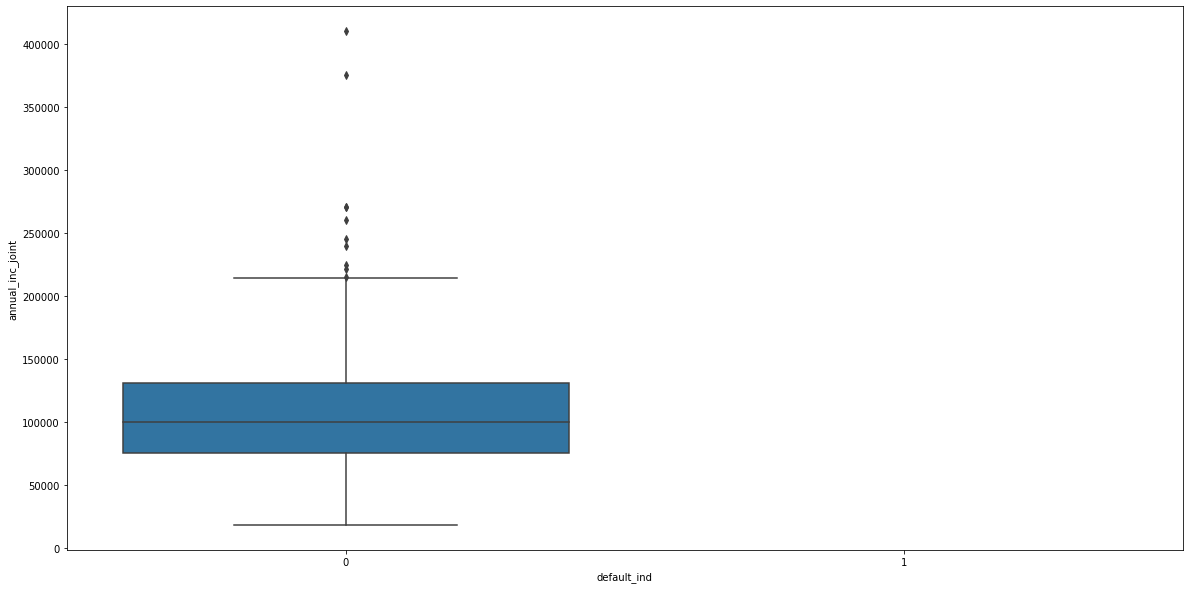

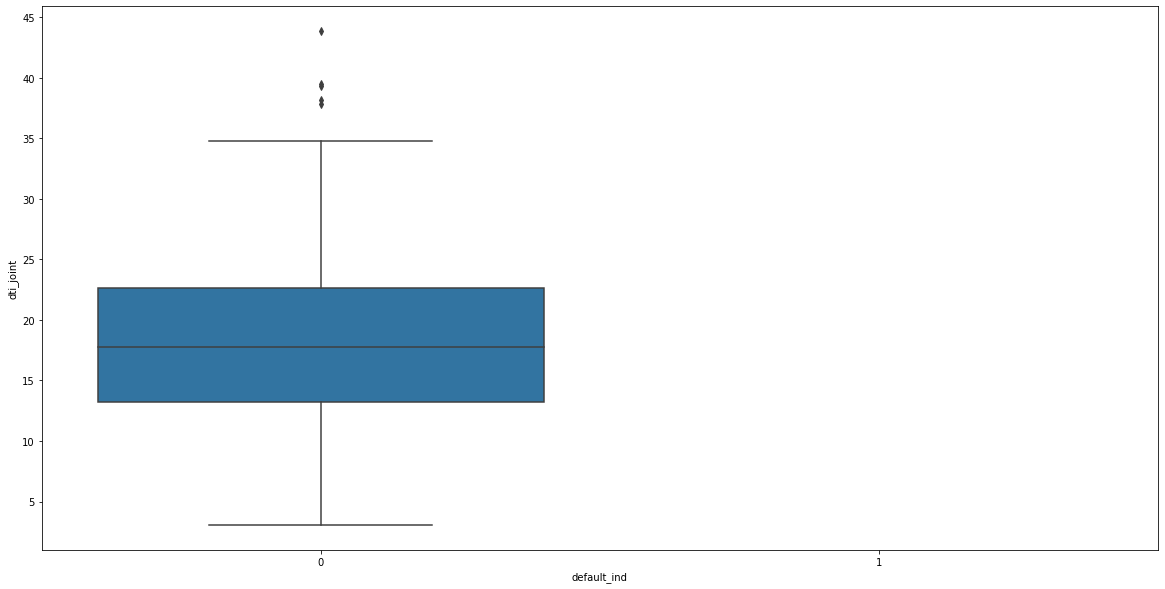

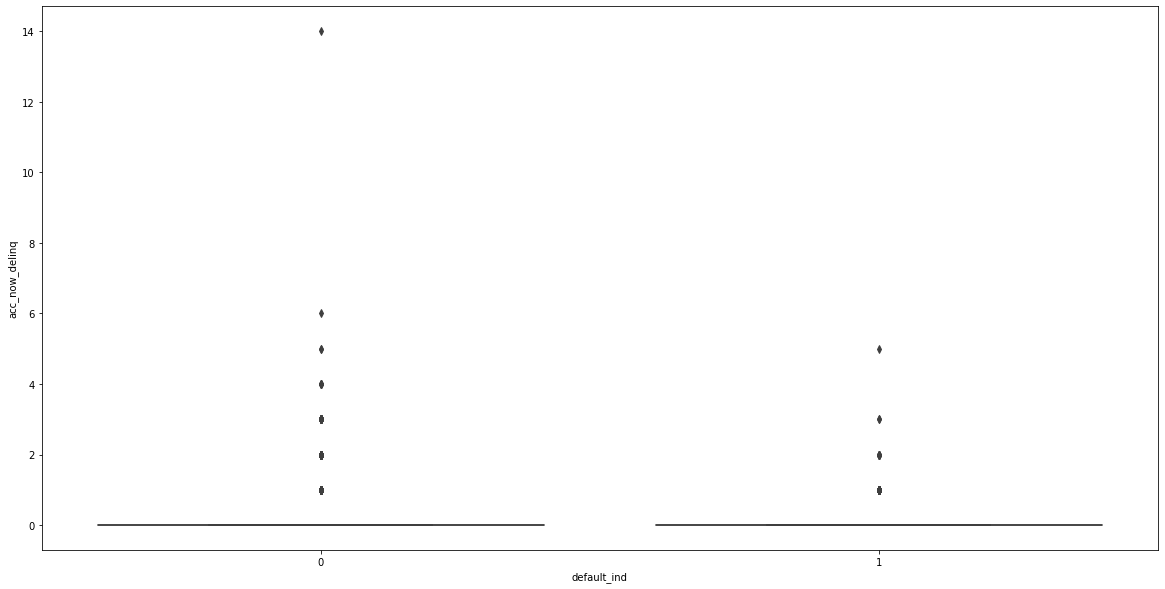

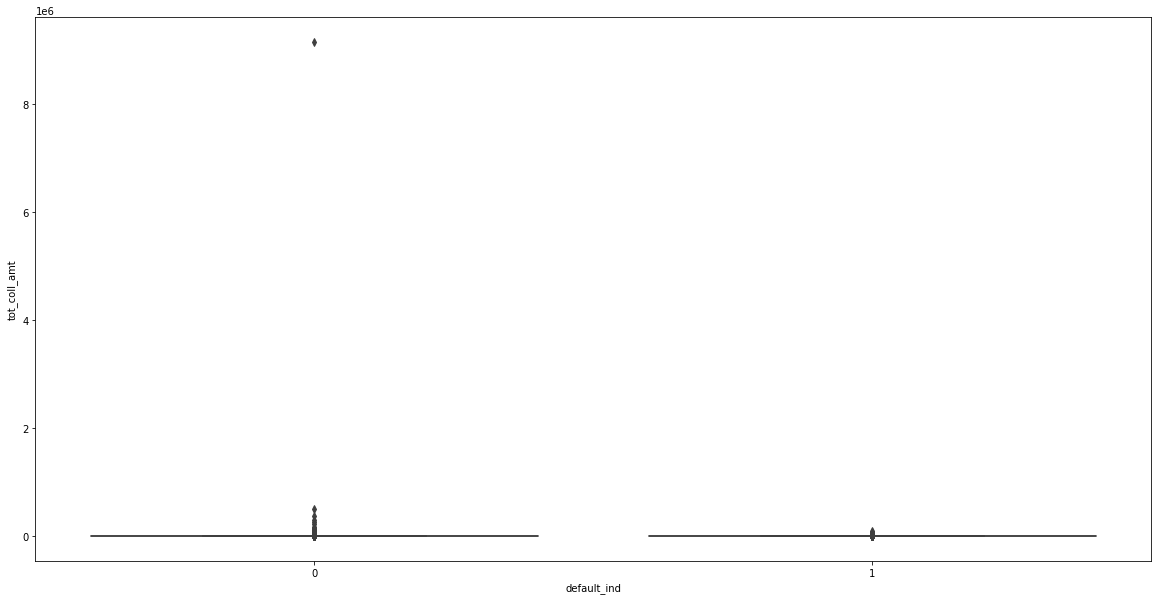

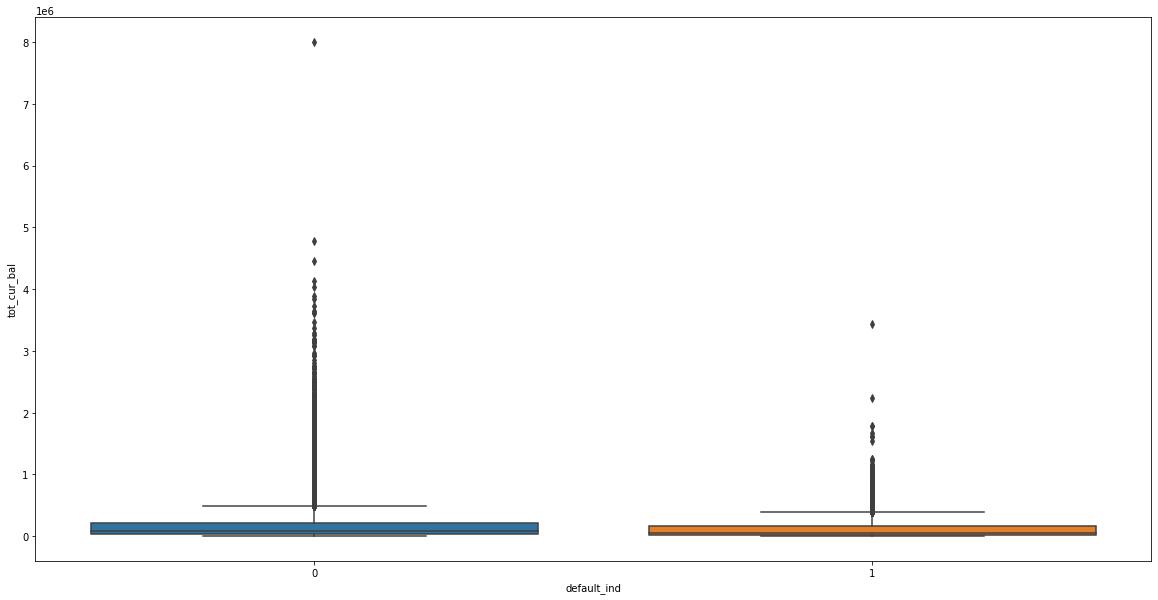

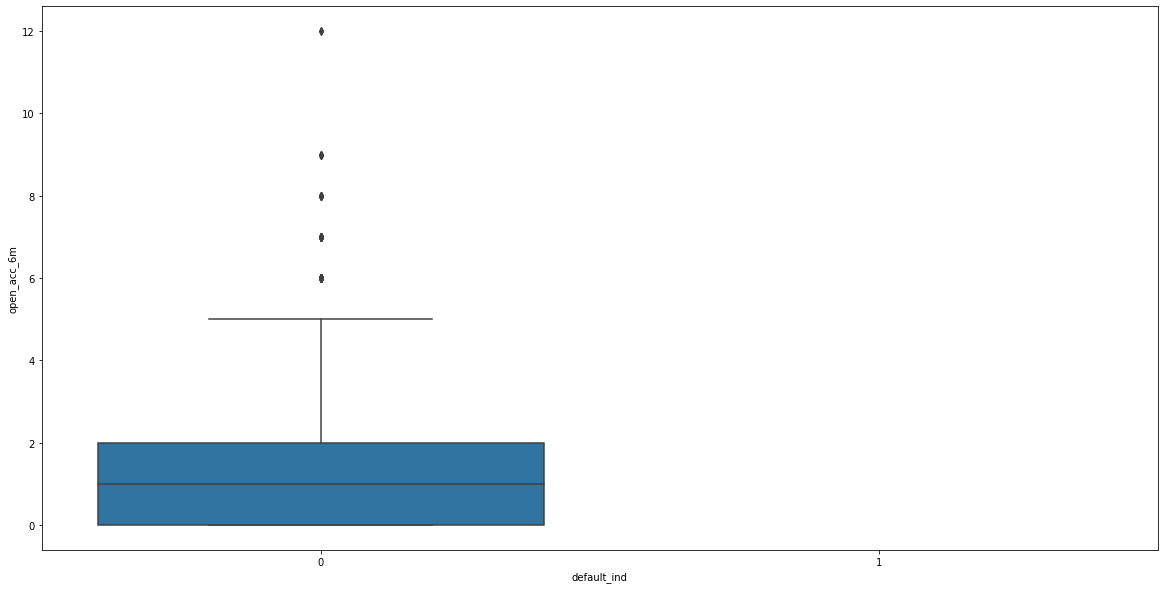

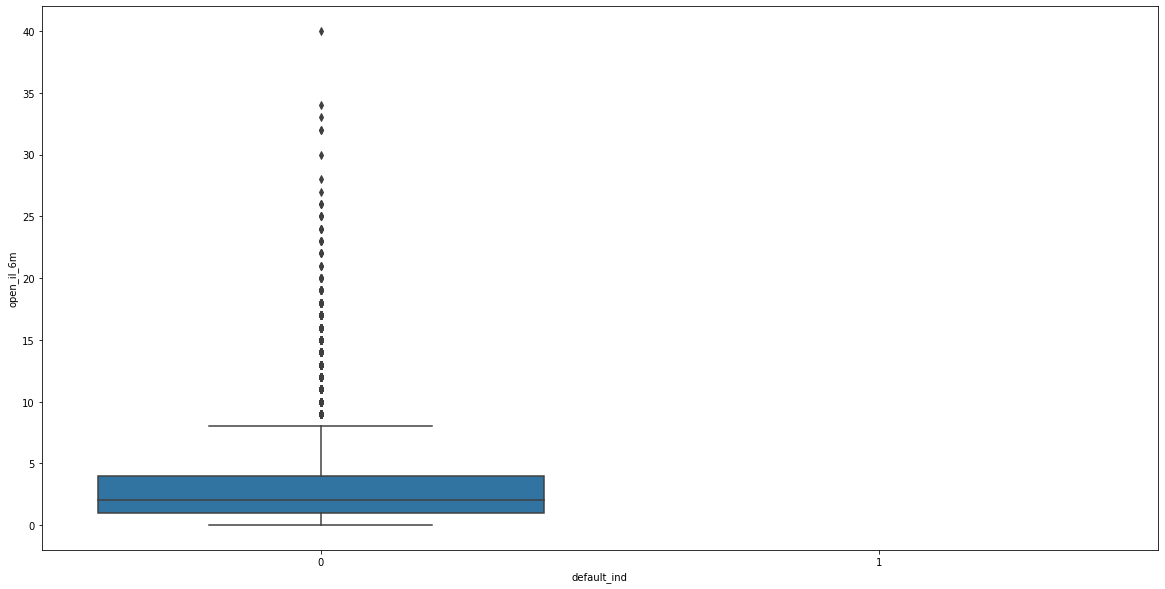

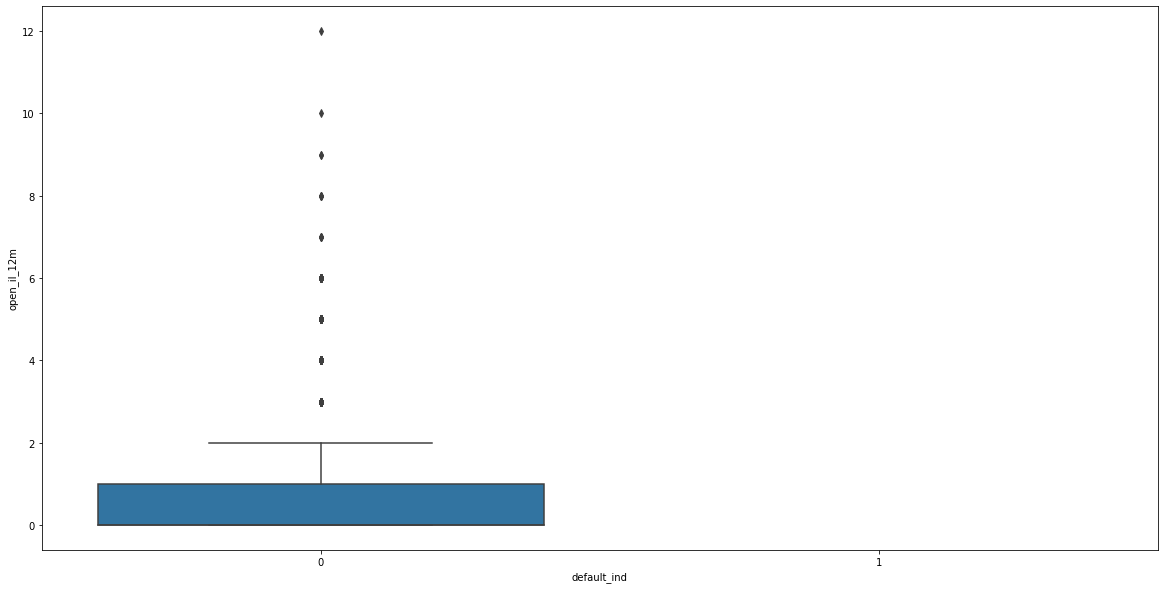

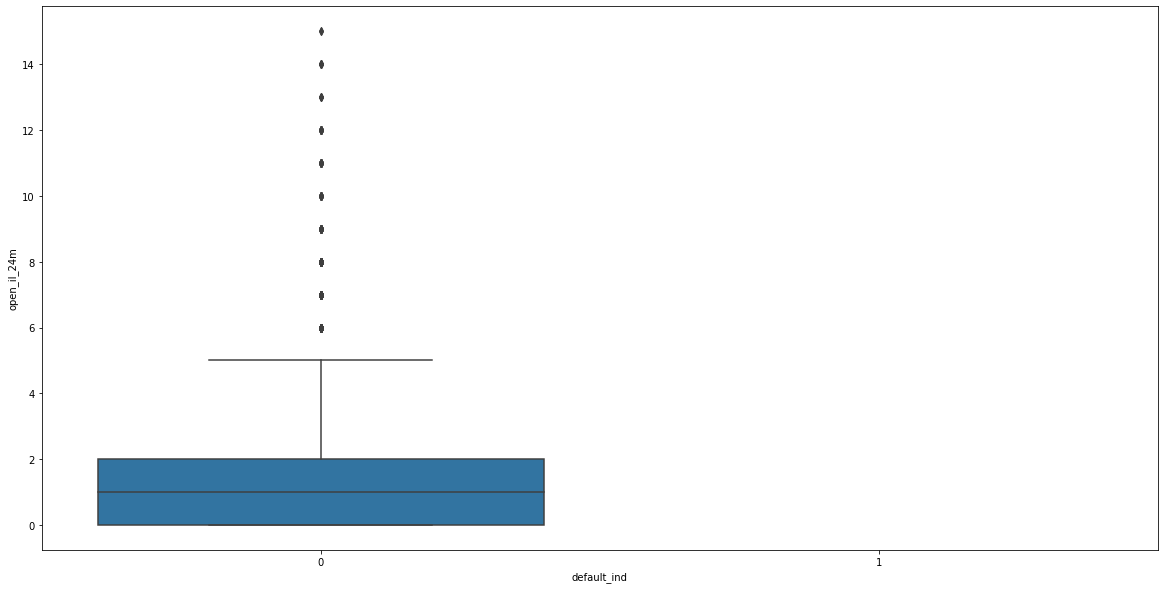

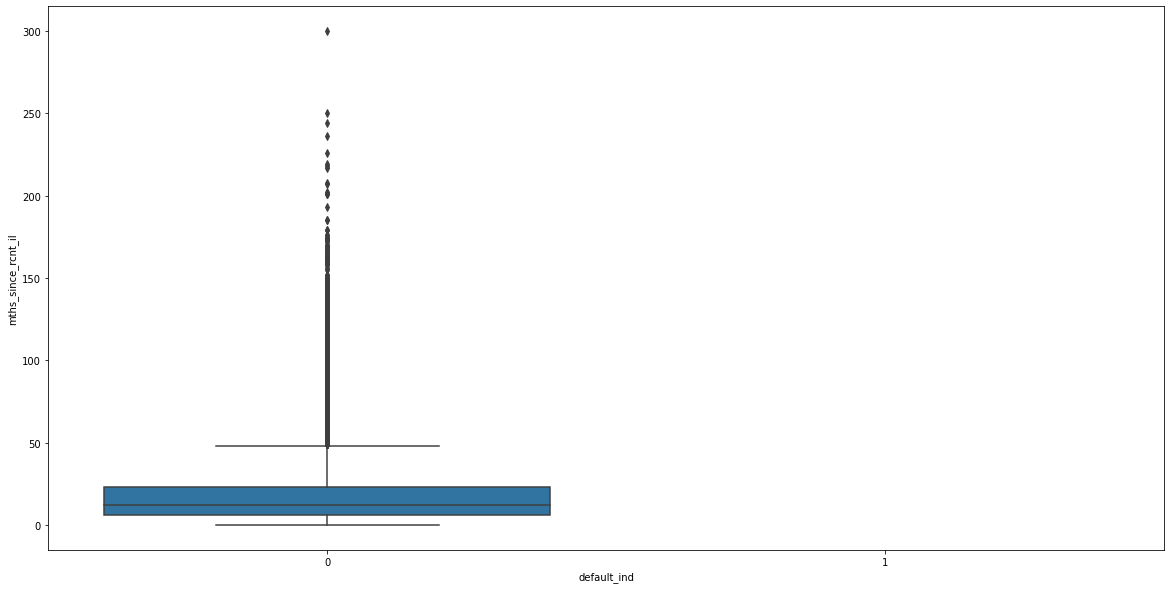

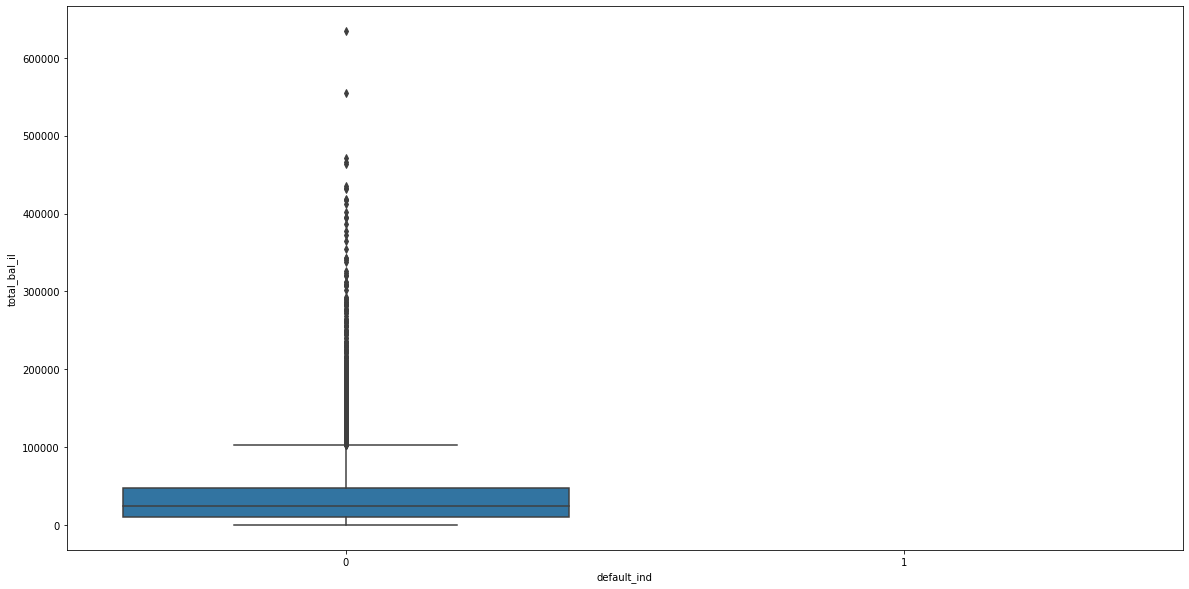

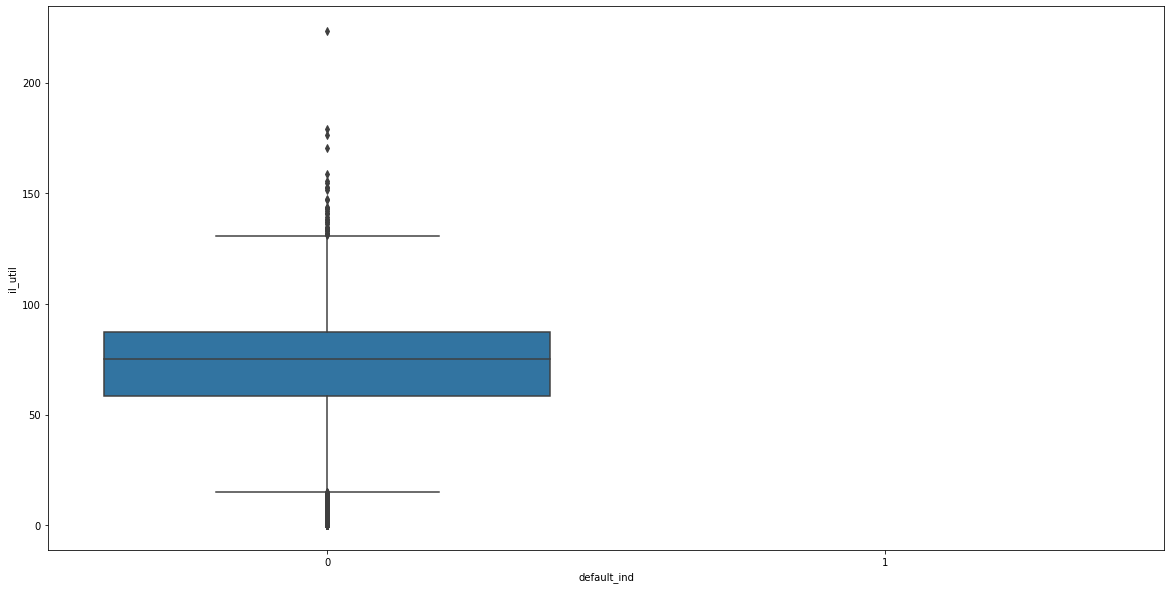

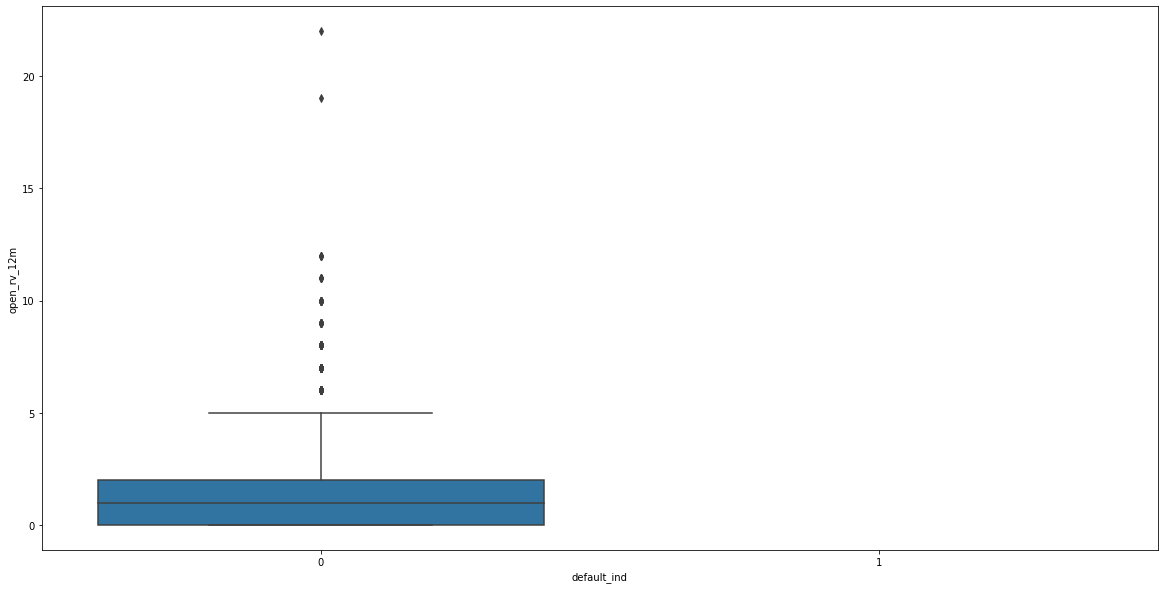

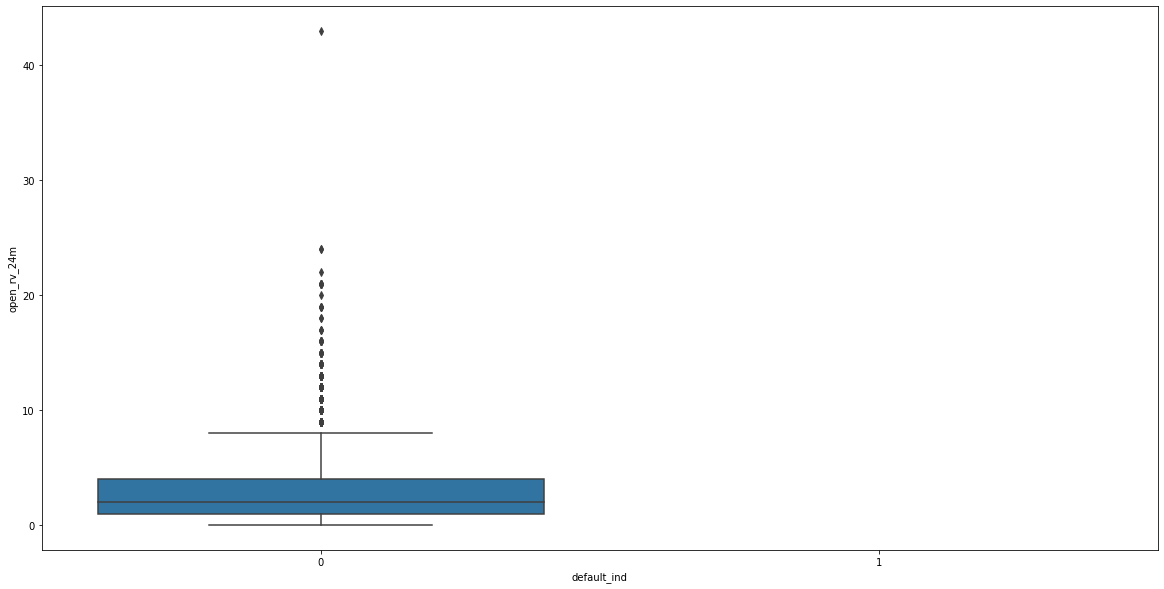

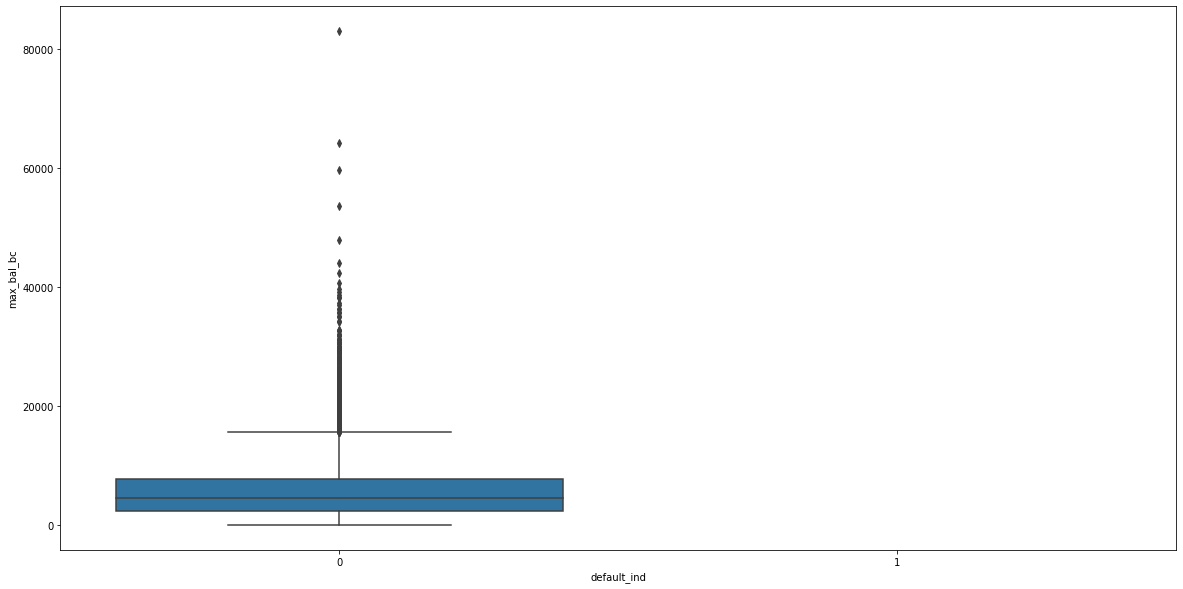

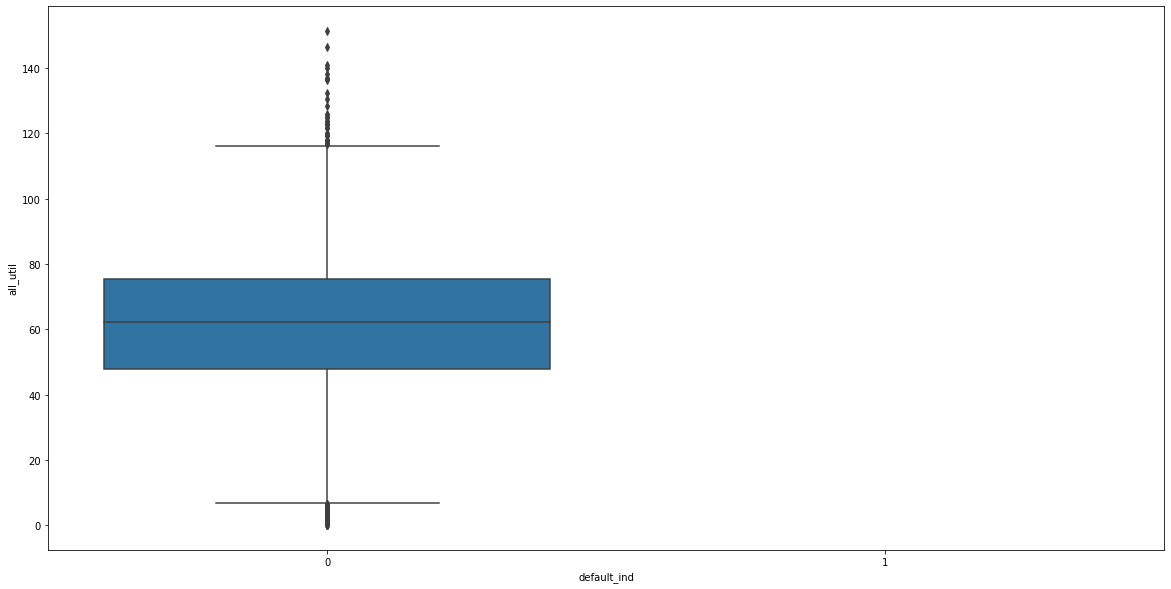

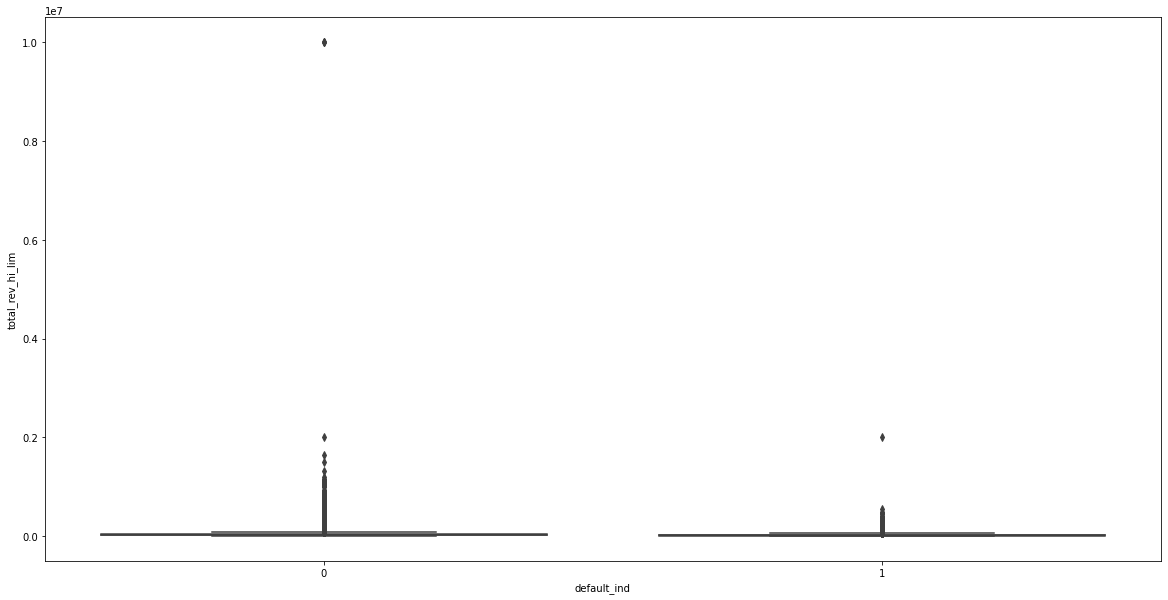

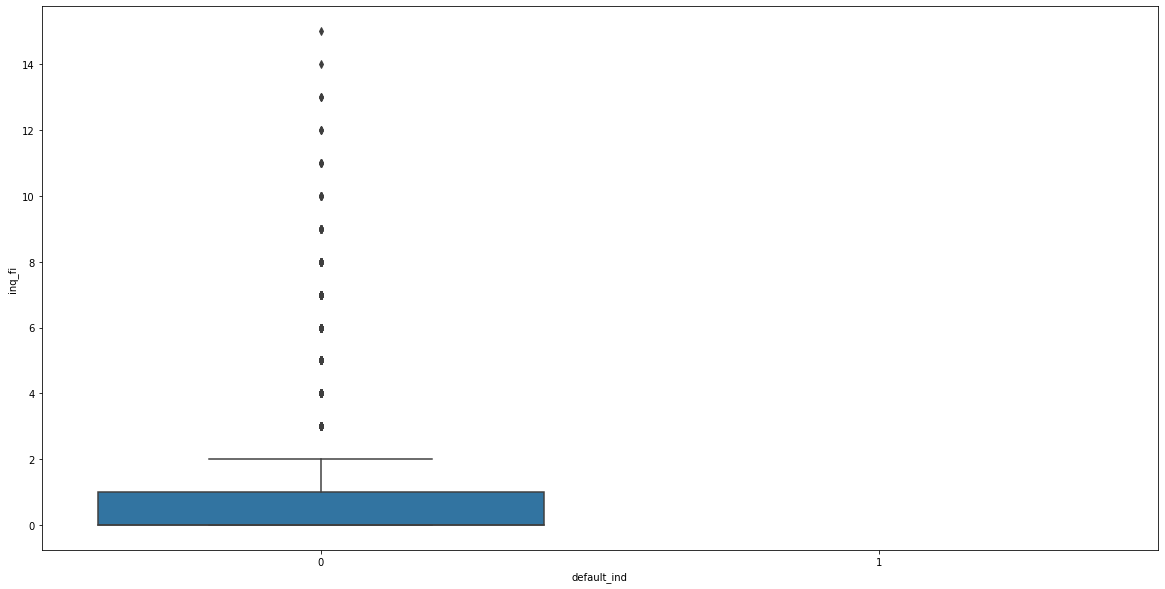

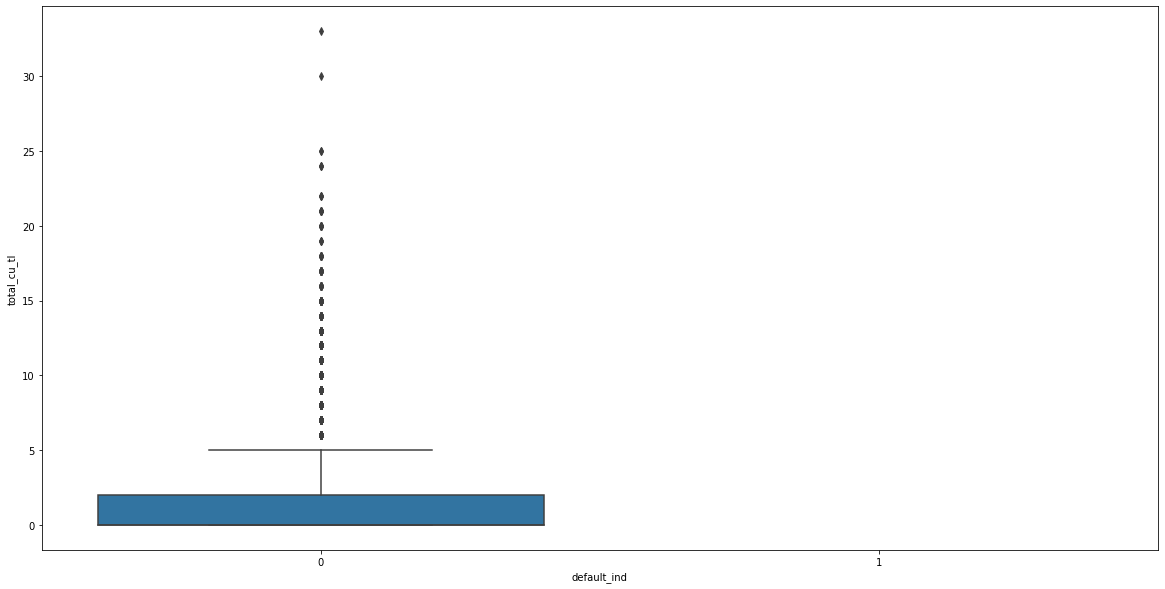

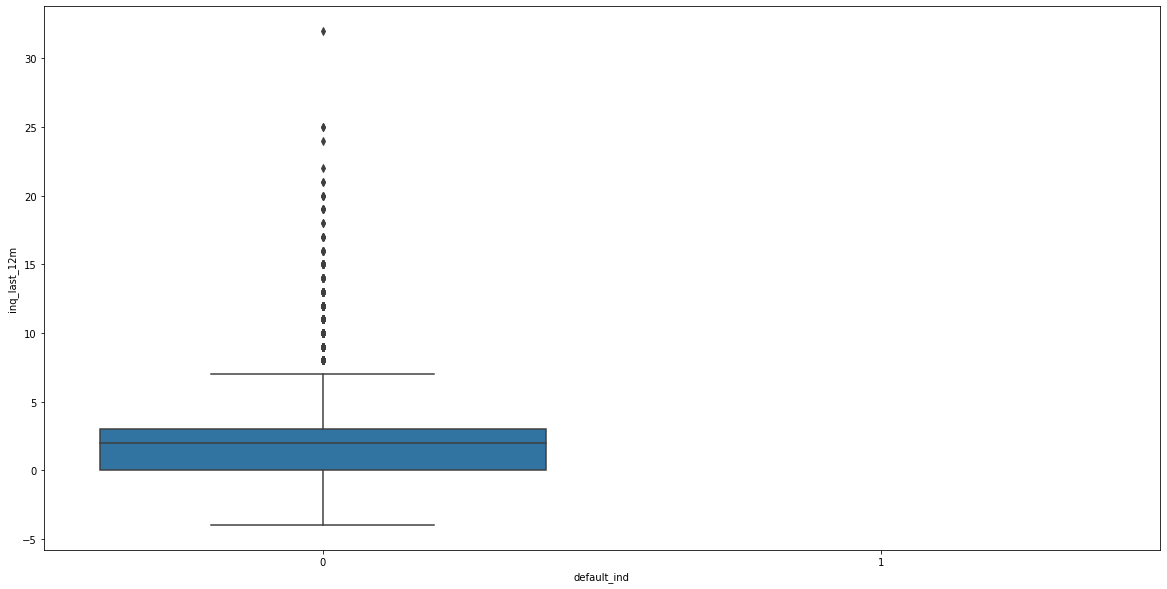

In [241]:
for i in cols:
  plt.figure(figsize=(20,10))
  sns.boxplot(data_num['default_ind'],data_num[i])

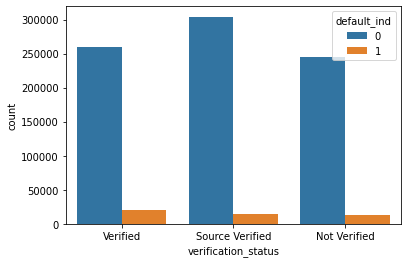

In [242]:
sns.countplot(data1['verification_status'],hue=data1['default_ind'])

# correlation between variables

In [243]:
data_num.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,855969.000000,416157.000000,131184.000000,855969.000000,855969.000000,8.559690e+05,855523.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,855913.000000,213139.000000,855969.0,442.000000,440.000000,855969.000000,7.886560e+05,7.886560e+05,13288.000000,13288.000000,13288.000000,13288.000000,12934.000000,13288.000000,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
mean,14745.571335,14732.378305,14723.710938,13.189916,436.212067,7.510373e+04,18.122236,0.311621,0.680915,34.149944,70.463959,11.542447,0.194537,1.691053e+04,55.019497,25.269269,8284.542969,8281.175781,7653.950684,7622.844238,5851.820801,1754.927124,0.319529,47.089603,4.951231,2226.285400,0.014230,44.101452,1.0,107412.156250,18.318476,0.004944,2.254082e+02,1.397676e+05,1.072998,2.945665,0.749323,1.666767,20.833153,36511.609375,71.486908,1.354305,2.945515,5840.448730,61.024471,3.216146e+04,0.947772,1.524232,1.841963,0.054286
std,8425.340005,8419.471653,8429.149414,4.366093,243.668320,6.425615e+04,17.419512,0.857189,0.964033,21.868347,27.826330,5.308094,0.581585,2.222374e+04,23.806990,11.818841,8457.854492,8455.100586,7908.611328,7884.908691,6673.848633,2081.329590,3.596206,411.174133,62.294647,4865.778809,0.133305,22.165277,0.0,47987.617188,7.221854,0.077333,1.048748e+04,1.539199e+05,1.206898,3.080292,0.986167,1.685390,26.738926,42492.796875,23.015284,1.483668,2.595248,5108.491699,20.018181,3.769116e+04,1.441681,2.697535,2.975011,0.226581
min,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.050000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,8000.000000,8000.000000,8000.000000,9.990000,260.549988,4.500000e+04,11.880000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.469000e+03,37.599998,17.000000,0.000000,0.000000,1969.689941,1960.119995,1239.949951,451.269989,0.000000,0.000000,0.000000,285.420013,0.000000,27.000000,1.0,75000.250000,13.187500,0.000000,0.000000e+00,2.987000e+04,0.000000,1.000000,0.000000,0.000000,6.000000,10390.250000,58.500000,0.000000,1.000000,2405.000000,47.900002,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,13000.000000,13000.000000,13000.000000,12.990000,382.549988,6.500000e+04,17.610001,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.190300e+04,55.900002,24.000000,6290.250000,6287.649902,4976.160156,4948.250000,3286.889893,1076.910034,0.000000,0.000000,0.000000,468.820007,0.000000,44.000000,1.0,100000.000000,17.735001,0.000000,0.000000e+00,8.100850e+04,1.000000,2.000000,0.000000,1.000000,12.000000,24959.500000,75.000000,1.000000,2.000000,4485.500000,62.099998,2.380000e+04,0.000000,0.000000,2.000000,0.000000
75%,20000.000000,20000.000000,20000.000000,15.990000,571.559998,9.000000e+04,

As the mean and the median(50%) of the numerical features of the data are mostly close to each other,it shows that the data is somewhat normally distributed.

In [244]:
data_num.corr('spearman')

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
loan_amnt,1.000000,0.999382,0.997113,0.114490,0.960242,0.503831,0.055750,0.008002,-0.039640,-0.038328,0.015297,0.216130,-0.112762,0.501730,0.121585,0.237571,0.515491,0.515479,0.427287,0.428346,0.331400,0.560034,-0.015528,0.000852,-0.000951,0.589121,-0.018337,-0.031215,NaN,0.497825,0.030982,0.003544,-0.078965,0.354133,-0.038391,0.065412,-0.015789,0.031382,0.018654,0.148682,-0.136075,-0.053988,-0.033086,0.429670,-0.011091,0.463545,0.015592,0.078820,0.003822,-0.005065
funded_amnt,0.999382,1.000000,0.997900,0.114852,0.961213,0.503550,0.056506,0.008326,-0.039938,-0.038367,0.015043,0.216543,-0.112360,0.501619,0.122050,0.237497,0.517379,0.517366,0.426174,0.427454,0.330243,0.559441,-0.015955,0.000073,-0.001577,0.589023,-0.018175,-0.031213,NaN,0.497825,0.030982,0.003643,-0.078965,0.354132,-0.038391,0.065412,-0.015789,0.031382,0.018654,0.148682,-0.136075,-0.053988,-0.033086,0.429670,-0.011091,0.463544,0.015592,0.078820,0.003822,-0.005824
funded_amnt_inv,0.997113,0.997900,1.000000,0.114856,0.958733,0.502538,0.058721,0.008998,-0.040915,-0.036744,0.024361,0.217477,-0.110837,0.500757,0.122517,0.237854,0.522106,0.522109,0.421114,0.425820,0.325315,0.555779,-0.018495,-0.002608,-0.004174,0.586723,-0.017714,-0.030985,NaN,0.499120,0.028808,0.003862,-0.078946,0.354127,-0.038779,0.064941,-0.016493,0.030633,0.019339,0.148091,-0.136633,-0.054200,-0.033299,0.430026,-0.012015,0.463663,0.015209,0.078845,0.003425,-0.008817
int_rate,0.114490,0.114852,0.114856,1.000000,0.109546,-0.124160,0.164491,0.065817,0.228297,-0.031284,0.018187,-0.015343,0.069320,-0.030948,0.279749,-0.051910,-0.013077,-0.013170,0.152297,0.153589,0.023785,0.422789,0.049450,0.113504,0.112223,0.099485,0.014247,-0.011563,NaN,-0.067894,0.267412,0.027300,0.031690,-0.094461,0.206481,0.059057,0.233524,0.184918,-0.211572,0.079796,0.204929,0.154280,0.159668,-0.136608,0.317429,-0.236224,0.157016,0.012782,0.259818,0.149864
installment,0.960242,0.961213,0.958733,0.109546,1.000000,0.483529,0.048224,0.015208,-0.013837,-0.041304,0.012947,0.204290,-0.104777,0.482381,0.138192,0.216037,0.443130,0.443116,0.472379,0.473331,0.394767,0.553631,-0.010091,0.008574,0.007447,0.629930,-0.016561,-0.033624,NaN,0.473761,0.028643,0.005389,-0.072990,0.316699,-0.025798,0.048612,-0.007974,0.023820,0.015014,0.129327,-0.127988,-0.033426,-0.013678,0.407187,-0.002713,0.429227,0.014424,0.062424,0.019057,0.005443
annual_inc,0.503831,0.503550,0.502538,-0.124160,0.483529,1.000000,-0.211412,0.087625,0.040445,-0.082116,-0.094716,0.243333,-0.052012,0.411157,0.072974,0.328770,0.249546,0.249571,0.220211,0.220644,0.199264,0.204983,-0.011001,-0.036006,-0.035549,0.332766,-0.004761,-0.060741,NaN,0.619723,-0.029673,0.022403,-0.036813,0.533187,0.042793,0.182218,0.107330,0.172834,-0.108219,0.322574,-0.113630,-0.020841,-0.021032,0.363579,0.006711,0.409336,0.094992,0.111519,0.089863,-0.059812
dti,0.055750,0.056506,0.058721,0.164491,0.048224,-0.211412,1.000000,-0.009825,-0.006056,0.001723,0.063410,0.322318,-0.050740,0.247968,0.168526,0.236381,0.129421,0.129375,-0.082802,-0.080468,-0.114612,0.031060,-0.013768,-0.006137,-0.005306,-0.035925,-0.000516,0.028362,NaN,-0.138116,0.569900,0.006849,-0.024224,0.109181,0.056405,0.404970,0.214655,0.320018,-0.236262,0.411038,-0.012313,-0.000832,0.033589,0.117230,0.198169,0.143256,0.096163,0.129894,0.038451,0.014197
delinq_2yrs,0.008002,0.008326,0

### Let's check if annual income is correlated with loan amount issued.

In [245]:
data_num[['annual_inc','loan_amnt']].corr('spearman')

,annual_inc,loan_amnt
annual_inc,1.000000,0.503831
loan_amnt,0.503831,1.000000


In [246]:
data_num[data_num['default_ind']==1][['annual_inc','loan_amnt']].corr(method='spearman')

,annual_inc,loan_amnt
annual_inc,1.000000,0.538333
loan_amnt,0.538333,1.000000


there's a little positive correlation between the variables for the people who defaulted.

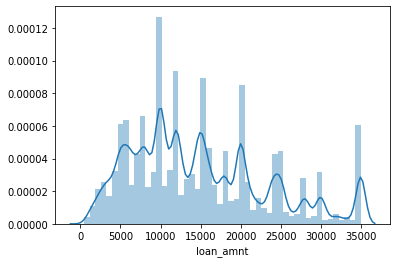

In [247]:
sns.distplot(data_num['loan_amnt'],hist = True)

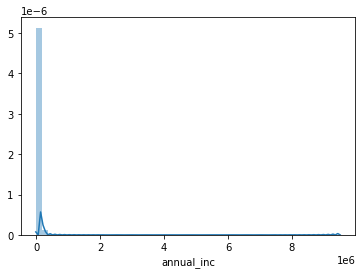

In [248]:
sns.distplot(data_num['annual_inc'],hist = True)

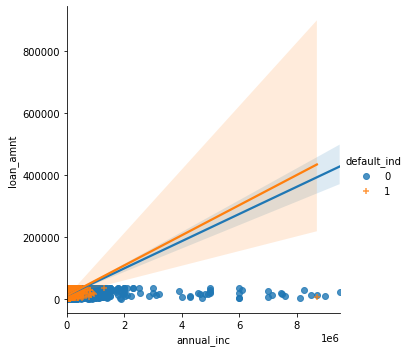

In [249]:
sns.lmplot('annual_inc','loan_amnt',data_num,fit_reg = True,hue='default_ind',markers=['o','+'])

But when plotting the regression plot it can be seen it is hardly correlated.

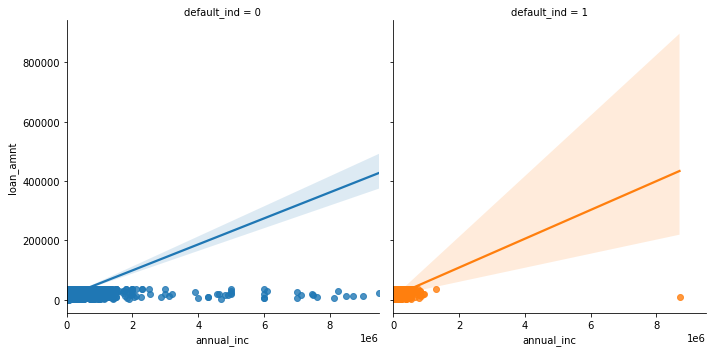

In [250]:
sns.lmplot('annual_inc','loan_amnt',data_num,col='default_ind',fit_reg=True,hue = 'default_ind')

In [0]:
slope,intercept,r_value,p_value,stnd_err = stats.linregress(data_num['annual_inc'],data_num['loan_amnt'])

In [252]:
print("Slope :",slope)
print("Intercept :",intercept)
print("R-Squared :",r_value**2)
print("P-Value :", p_value)
print("Error :",stnd_err)

Slope : 0.04394731714334344
Intercept : 11446.394736230135
R-Squared : 0.11236517220798697
P-Value : 0.0
Error : 0.00013350734616526032


The variables explain variance very poorly however they are significant as their p-value is 0.

### Let's check if debt to interest ratio(dti) is correlated to annual income 

In [253]:
data_num[['annual_inc','dti']].corr('spearman')

,annual_inc,dti
annual_inc,1.000000,-0.211412
dti,-0.211412,1.000000


In [254]:
data_num[data_num['default_ind']==1][['annual_inc','dti']].corr(method='spearman')

,annual_inc,dti
annual_inc,1.00000,-0.15307
dti,-0.15307,1.00000


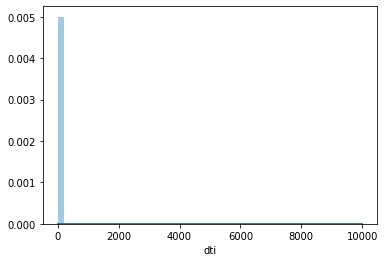

In [255]:
sns.distplot(data_num['dti'],hist=True)

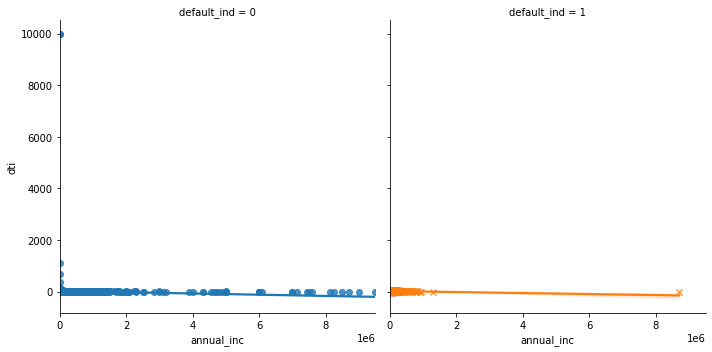

In [256]:
sns.lmplot('annual_inc','dti',data_num,hue='default_ind',col='default_ind',markers=['o','x'])

In [0]:
slope,intercept,r_value,p_value,stnd_err = stats.linregress(data_num['annual_inc'],data_num['dti'])

In [258]:
print("Slope :",slope)
print("Intercept :",intercept)
print("R-Squared :",r_value**2)
print("P-value :",p_value)
print("Error :",stnd_err)

Slope : -2.3539219813390403e-05
Intercept : 19.88928440369471
R-Squared : 0.007537871714098706
P-value : 0.0
Error : 2.9194171455515606e-07


### let's check the correlation between loan amount and interest rate.

In [259]:
data_num[['loan_amnt','int_rate']].corr('spearman')

,loan_amnt,int_rate
loan_amnt,1.00000,0.11449
int_rate,0.11449,1.00000


In [260]:
data_num[data_num['default_ind']==1][['loan_amnt','int_rate']].corr(method = 'spearman')

,loan_amnt,int_rate
loan_amnt,1.000000,0.254086
int_rate,0.254086,1.000000


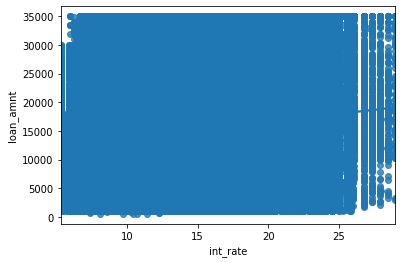

In [261]:
sns.regplot('int_rate','loan_amnt',data_num)

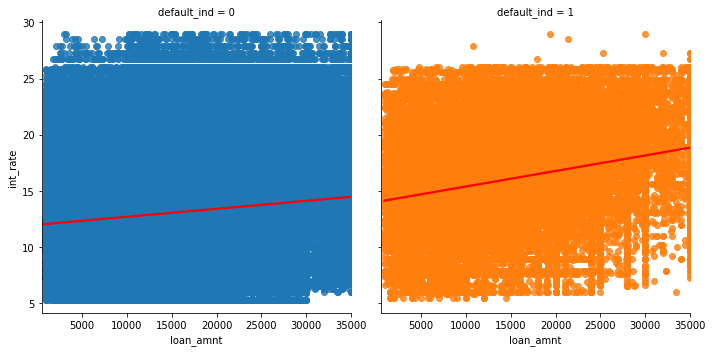

In [262]:
sns.lmplot('loan_amnt','int_rate',data_num,hue = 'default_ind',col = 'default_ind',line_kws = {'color':'red'})

In [263]:
slope,intercept,r_value,p_value,stnd_err = stats.linregress(data_num['loan_amnt'],data_num['int_rate'])
print("Slope :",slope)
print("Intercept :",intercept)
print("R-Squared :",r_value**2)
print("P-value :",p_value)
print("Error :",stnd_err)

Slope : 7.412511250608836e-05
Intercept : 12.099300828477269
R-Squared : 0.02043938061613563
P-value : 0.0
Error : 5.546495280061645e-07


### let's check correlation between interest rate and annual income

In [264]:
data_num[['int_rate','annual_inc']].corr('spearman')

,int_rate,annual_inc
int_rate,1.00000,-0.12416
annual_inc,-0.12416,1.00000


In [265]:
data_num[data_num['default_ind']==1][['int_rate','annual_inc']].corr('spearman')

,int_rate,annual_inc
int_rate,1.000000,0.070945
annual_inc,0.070945,1.000000


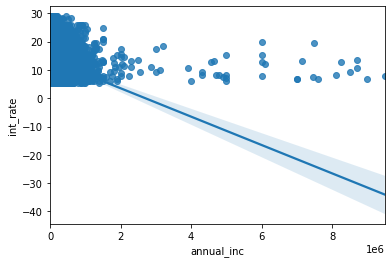

In [266]:
sns.regplot('annual_inc','int_rate',data_num)

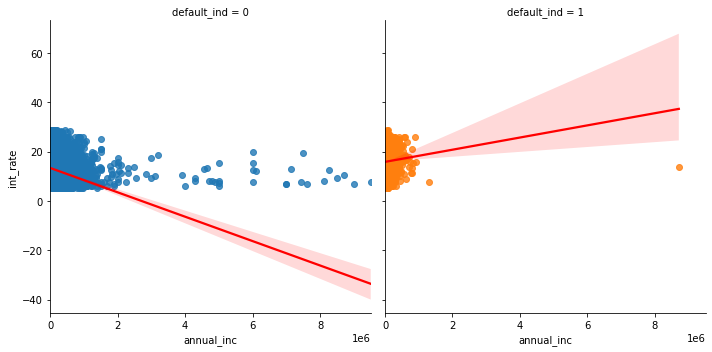

In [267]:
sns.lmplot('annual_inc','int_rate',data_num,col = 'default_ind',hue = 'default_ind',line_kws={'color':'red'})

In [268]:
slope,intercept,r_value,p_value,stnd_err = stats.linregress(data_num['annual_inc'],data_num['int_rate'])
print("Slope :",slope)
print("Intercept :",intercept)
print("R-Squared :",r_value**2)
print("P-value :",p_value)
print("Error :",stnd_err)

Slope : -5.018217426130775e-06
Intercept : 13.569041425549669
R-Squared : 0.0054500807194596155
P-value : 0.0
Error : 7.327111312806453e-08


## Most of the features in the data set are independant to each other and no so much positively or negatively correlated.

# Let's visualise the characteristics of deafaulters.



0    809502
1     46467
Name: default_ind, dtype: int64


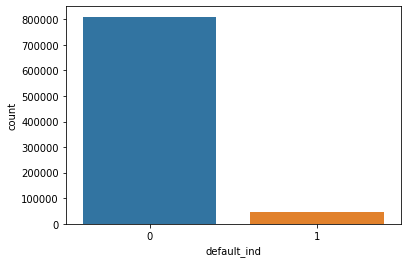

In [269]:
sns.countplot(data1['default_ind'])
print(data1.default_ind.value_counts())

In [0]:
data_group = data1.groupby('default_ind')
default_group = data_group.get_group(1)
nondefault_group = data_group.get_group(0)

In [271]:
print ("Percent of defaulters in this data is {}% !!!! .".format(len(default_group)/len(data1) * 100))

Percent of defaulters in this data is 5.428584446399344% !!!! .


Total Number of defaulters.
where 1 is the list of defaulters
and 0 is the list of non deafaulters

### Checking the loan amount opted by the defaulters.

In [272]:
default_group['loan_amnt'].max()

35000

In [273]:
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.93,0.96,0.99,1]:
  print(i*100,"% of the defaulter had opted for {} amount of loan.".format(default_group['loan_amnt'].quantile(i)))

10.0 % of the defaulter had opted for 5000.0 amount of loan.
20.0 % of the defaulter had opted for 7000.0 amount of loan.
30.0 % of the defaulter had opted for 9325.0 amount of loan.
40.0 % of the defaulter had opted for 10625.0 amount of loan.
50.0 % of the defaulter had opted for 12700.0 amount of loan.
60.0 % of the defaulter had opted for 15000.0 amount of loan.
70.0 % of the defaulter had opted for 18000.0 amount of loan.
80.0 % of the defaulter had opted for 21000.0 amount of loan.
90.0 % of the defaulter had opted for 27000.0 amount of loan.
93.0 % of the defaulter had opted for 30000.0 amount of loan.
96.0 % of the defaulter had opted for 34052.000000000044 amount of loan.
99.0 % of the defaulter had opted for 35000.0 amount of loan.
100 % of the defaulter had opted for 35000.0 amount of loan.


Considering that the amount is in dollar, that's a huge amount that the defaulter opted for.

In [274]:
len(default_group[default_group['loan_amnt']==35000])

1795

In [275]:
print("About {}% of defaulters had opted for the huge amount of 35000.".format(len(default_group[default_group['loan_amnt']==35000])/len(default_group) * 100))

About 3.862956506768244% of defaulters had opted for the huge amount of 35000.


### Let's See the employment length of the defaulters.

10.0    13508
2.0      4119
0.0      3942
3.0      3638
5.0      3280
1.0      3059
4.0      2841
6.0      2758
7.0      2673
8.0      2227
9.0      1826
Name: emp_length, dtype: int64


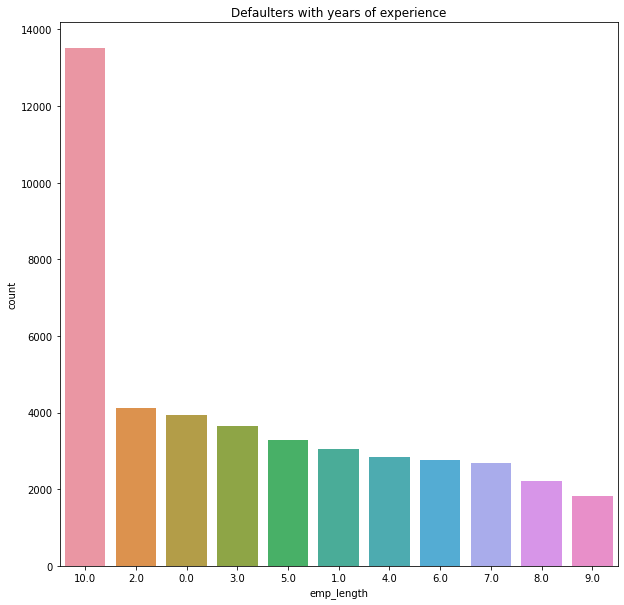

In [276]:
plt.figure(figsize=(10,10))
sns.countplot(default_group['emp_length'],order=default_group['emp_length'].value_counts().index)
plt.title('Defaulters with years of experience')
print(default_group['emp_length'].value_counts())

People with mostly 10 or more years of experince are more likely to default and after them comes the freshers with about 0-3 years of experince.

### Visualising installment affect on defaulters 

In [277]:
print("Max amount of monthly installment amount by the defaulters are {}.".format(default_group['installment'].max()))

Max amount of monthly installment amount by the defaulters are 1424.5699462890625.


In [278]:
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
  print(i*100,'% defaulters had monthly installment of {} for their loan.'.format(default_group['installment'].quantile(i)))

10.0 % defaulters had monthly installment of 165.1199951171875 for their loan.
20.0 % defaulters had monthly installment of 233.60000610351562 for their loan.
30.0 % defaulters had monthly installment of 291.19000244140625 for their loan.
40.0 % defaulters had monthly installment of 340.17999267578125 for their loan.
50.0 % defaulters had monthly installment of 391.1700134277344 for their loan.
60.0 % defaulters had monthly installment of 460.9880004882812 for their loan.
70.0 % defaulters had monthly installment of 529.9600219726562 for their loan.
80.0 % defaulters had monthly installment of 627.510009765625 for their loan.
90.0 % defaulters had monthly installment of 788.2079956054688 for their loan.
100 % defaulters had monthly installment of 1424.5699462890625 for their loan.


Since there is almost double amount of jump after 90, it shows the person who must be taken huge amount of loan and has defaulted.

In [279]:
for i in [0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1]:
  print(i*100,'% defaulters had monthly installment of {} for their loan.'.format(default_group['installment'].quantile(i)))

90.0 % defaulters had monthly installment of 788.2079956054688 for their loan.
91.0 % defaulters had monthly installment of 814.2100219726562 for their loan.
92.0 % defaulters had monthly installment of 842.3499755859375 for their loan.
93.0 % defaulters had monthly installment of 866.52001953125 for their loan.
94.0 % defaulters had monthly installment of 891.3412255859375 for their loan.
95.0 % defaulters had monthly installment of 927.3610168457021 for their loan.
96.0 % defaulters had monthly installment of 965.1980224609378 for their loan.
97.0 % defaulters had monthly installment of 1006.2421899414059 for their loan.
98.0 % defaulters had monthly installment of 1088.18994140625 for their loan.
99.0 % defaulters had monthly installment of 1212.949951171875 for their loan.
100 % defaulters had monthly installment of 1424.5699462890625 for their loan.


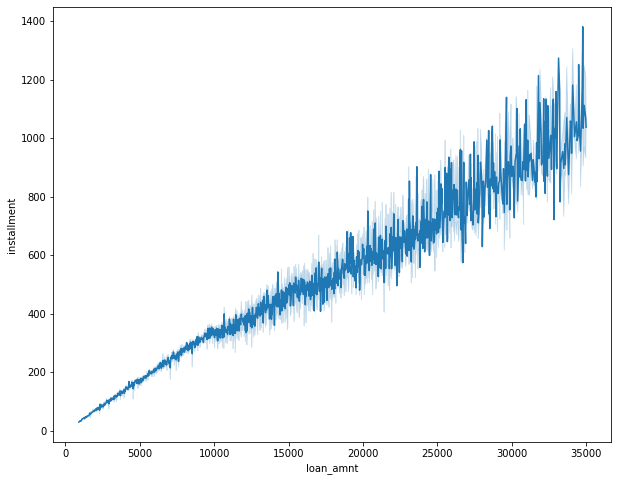

In [280]:
plt.figure(figsize=(10,8))
sns.lineplot(default_group['loan_amnt'],default_group['installment'])

It's obvious that people taking higher amount of loan will pay more installment amount per month.

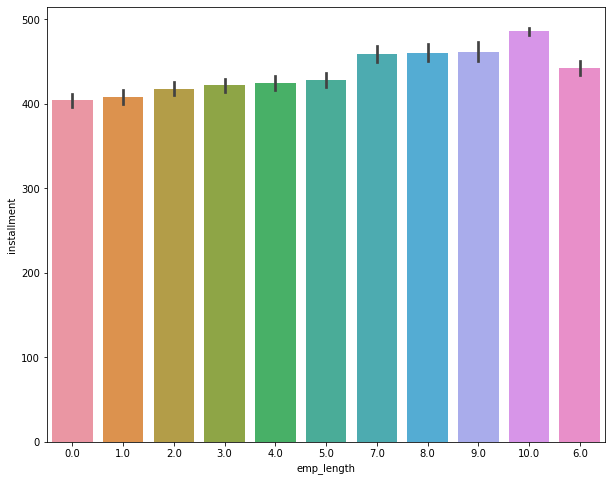

In [281]:
plt.figure(figsize=(10,8))
sns.barplot(default_group['emp_length'],default_group['installment'])

People with higher experience tends to pay more monthly installments,which makes sense that people with more years of experience will have more monthly income so they will opt for more amount of loan.

### Checking the annual income of defaulters

In [282]:
default_group['annual_inc'].max()

8706582.0

It's strange that people with so high income defaulting,maybe they forgot to pay or maybe they got stuck.

In [283]:
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
  print(i*100,'% people walked',default_group['annual_inc'].quantile(i))

10.0 % people walked 30000.0
20.0 % people walked 38000.0
30.0 % people walked 44000.0
40.0 % people walked 50000.0
50.0 % people walked 56000.0
60.0 % people walked 64000.0
70.0 % people walked 72000.0
80.0 % people walked 85000.0
90.0 % people walked 105000.0
100 % people walked 8706582.0


Clearly the jump after the 90 percent shows the presence of sum outlier. let's see between the 90-100 range.

In [284]:
for i in [0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1]:
  print(i*100,'% people walked',default_group['annual_inc'].quantile(i))

90.0 % people walked 105000.0
91.0 % people walked 110000.0
92.0 % people walked 115000.0
93.0 % people walked 120000.0
94.0 % people walked 124800.0
95.0 % people walked 130000.0
96.0 % people walked 140000.0
97.0 % people walked 150000.0
98.0 % people walked 170000.0
99.0 % people walked 200000.0
100 % people walked 8706582.0


This confirms the presence of the outlier

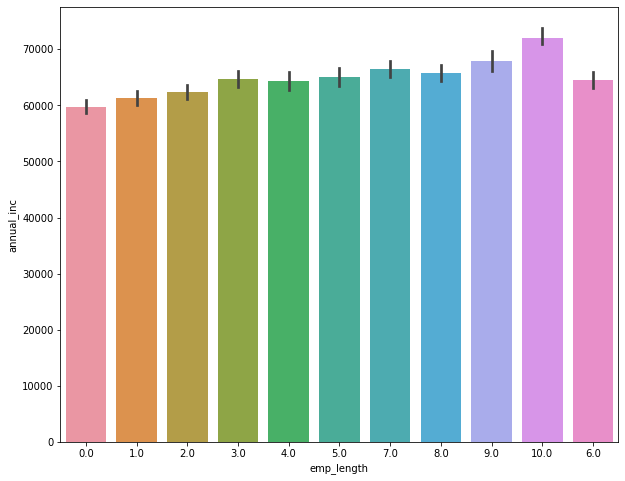

In [285]:
plt.figure(figsize=(10,8))
sns.barplot(default_group['emp_length'],default_group['annual_inc'])

As expected higher experience level means more the amount earned.Let's see if there are any talents with less years of experience and earning more.

In [286]:
print(len(default_group[(default_group['annual_inc']>180000 ) & (default_group['emp_length']<=3)]))
print()
default_group[(default_group['annual_inc']>150000 ) & (default_group['emp_length']<=3)].head(5)

237



,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
597,1062257,1294315,22200,22200,22200.000000,36 months,19.420000,818.489990,E,E3,Grace & Growth Family Services,2,RENT,160000.0,Source Verified,01-12-2011,n,NaN,debt_consolidation,debt consolidation,912xx,CA,13.330000,0,01-10-1996,1,69.0,NaN,12,0,10070,89.099998,25,f,0.0,0.0,9174.610352,9174.610352,4940.209961,3242.590088,0.000000,991.809998,9.8100,01-10-2012,818.489990,NaN,01-03-2013,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1464,1050329,1281759,30000,30000,30000.000000,60 months,20.299999,799.840027,E,E5,Tampa Bay Storm,0,MORTGAGE,525000.0,Verified,01-12-2011,n,Borrower added on 12/01/11 > consolidate my ...,other,Consolidation,335xx,FL,8.500000,0,01-09-2000,0,64.0,NaN,14,0,37725,75.000000,42,f,0.0,0.0,5780.419922,5780.419922,1828.290039,2966.489990,0.000000,985.640015,10.0400,01-07-2012,799.840027,NaN,01-11-2012,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1692,1047248,1278330,35000,35000,34963.332031,60 months,23.129999,989.289978,G,G2,Merrill Lynch,3,MORTGAGE,220000.0,Source Verified,01-12-2011,n,NaN,home_improvement,Home improvement loan,926xx,CA,18.360001,0,01-03-2000,3,NaN,NaN,8,0,51941,93.199997,28,f,0.0,0.0,11699.830078,11656.240234,3431.530029,6453.970215,0.000000,1814.329956,18.0000,01-10-2012,989.289978,NaN,01-03-2013,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2617,1033948,1263735,12000,12000,12000.000000,36 months,14.270000,411.709991,C,C2,Halliburton,0,RENT,159500.0,Source Verified,01-11-2011,n,NaN,credit_card,Credit Card,774xx,TX,13.710000,0,01-02-1989,0,73.0,NaN,15,0,19682,83.300003,39,f,0.0,0.0,14285.059570,14285.059570,11170.879883,2806.719971,120.809998,186.649994,33.5970,01-04-2015,60.520000,NaN,01-07-2015,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3161,1020621,1249409,35000,35000,34822.566406,60 months,20.299999,933.140015,E,E5,Kone Inc,0,MORTGAGE,191000.0,Verified,01-11-2011,n,NaN,house,Pay off homes Loans,701xx,LA,17.719999,2,01-11-1994,1,3.0,NaN,16,0,14925,75.199997,43,f,0.0,0.0,25126.300781,24994.259766,9482.389648,11957.059570,0.000000,3686.850098,36.6408,01-11-2013,933.140015,NaN,01-03-2014,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


So there are indeed 237 of people with less experience but high income,makes sense they defaulted.

Let's see if annual income has anything to do with monthly installment or not.

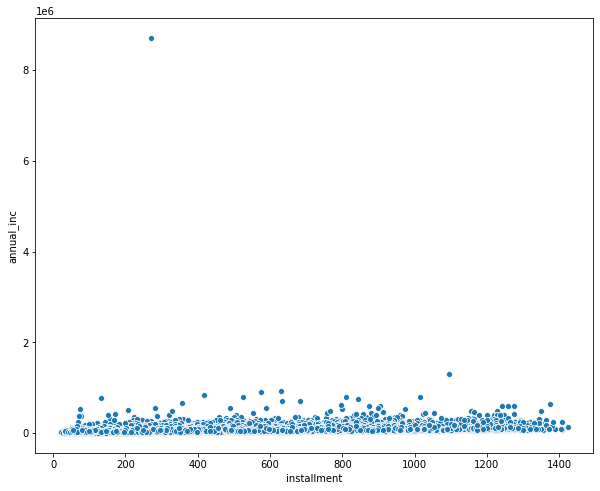

In [287]:
plt.figure(figsize=(10,8))
sns.scatterplot(default_group['installment'],default_group['annual_inc'])

This shows that Monthly income does not affect the amount of installments paid for the loan.

### Let's visualize the last delinquency of the defaulter

In [288]:
len(default_group['mths_since_last_delinq'])

46467

In [289]:
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.93,0.96,0.99,1]:
  print(i*100,"% of defaulters were {} months since last delinquency.".format(default_group['mths_since_last_delinq'].quantile(i)))

10.0 % of defaulters were 8.0 months since last delinquency.
20.0 % of defaulters were 13.0 months since last delinquency.
30.0 % of defaulters were 18.0 months since last delinquency.
40.0 % of defaulters were 24.0 months since last delinquency.
50.0 % of defaulters were 31.0 months since last delinquency.
60.0 % of defaulters were 38.0 months since last delinquency.
70.0 % of defaulters were 46.0 months since last delinquency.
80.0 % of defaulters were 56.0 months since last delinquency.
90.0 % of defaulters were 68.0 months since last delinquency.
93.0 % of defaulters were 72.0 months since last delinquency.
96.0 % of defaulters were 76.0 months since last delinquency.
99.0 % of defaulters were 81.0 months since last delinquency.
100 % of defaulters were 152.0 months since last delinquency.


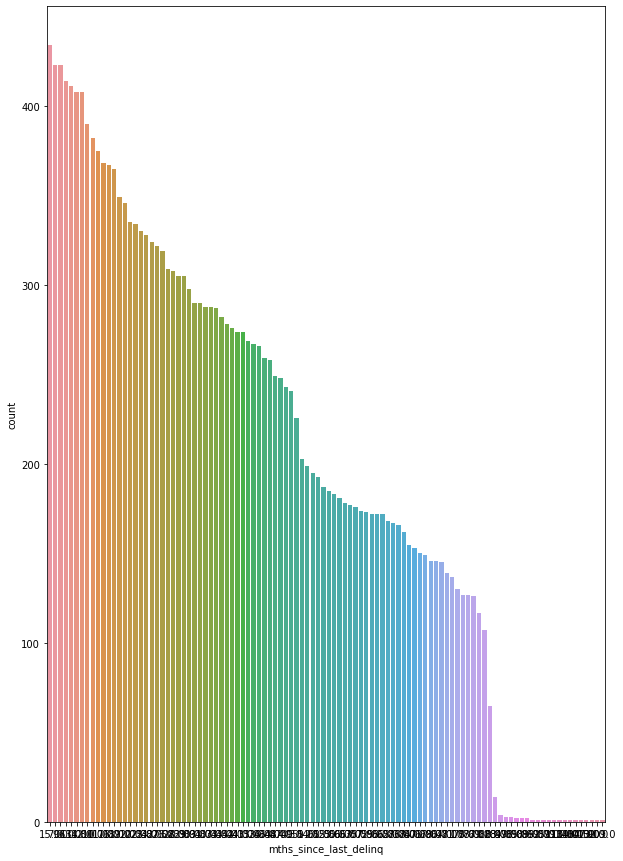

In [290]:
plt.figure(figsize=(10,15))
sns.countplot(default_group['mths_since_last_delinq'],order=default_group['mths_since_last_delinq'].value_counts().index)

### let's see which state had the most number of defaulters.

In [291]:
default_group['addr_state'].value_counts().head(5)

CA    7543
NY    4230
FL    3619
TX    3146
NJ    1890
Name: addr_state, dtype: int64

Turns out california,new york,texas,florida and illionos were the top states where the number of defaulters were present,with california having the most of them. 

In [292]:
print("FOR CA {} %".format(len(default_group[default_group['addr_state']=="CA"])/len(data1[data1['addr_state']=="CA"]) * 100))
print("FOR NY {} %".format(len(default_group[default_group['addr_state']=="NY"])/len(data1[data1['addr_state']=="NY"]) * 100))

FOR CA 6.026108075288404 %
FOR NY 5.9481958545434095 %


In [293]:
default_group['addr_state'].value_counts().tail(5)

WY    83
VT    71
NE     4
IA     1
ID     1
Name: addr_state, dtype: int64

In [294]:
print("FOR CA {} %".format(len(default_group[default_group['addr_state']=="IA"])/len(data1[data1['addr_state']=="IA"]) * 100))

FOR CA 14.285714285714285 %


In [295]:
state = default_group.addr_state.unique()
state

array(['GA', 'CA', 'TX', 'VA', 'FL', 'NY', 'PA', 'OH', 'IL', 'WA', 'MN',
       'AK', 'OR', 'AZ', 'WI', 'NC', 'CO', 'MO', 'WV', 'NV', 'SC', 'RI',
       'MA', 'KY', 'HI', 'NJ', 'MT', 'MI', 'SD', 'DC', 'OK', 'VT', 'NM',
       'MD', 'AL', 'KS', 'UT', 'LA', 'AR', 'CT', 'NH', 'DE', 'WY', 'MS',
       'TN', 'ID', 'NE', 'IN', 'IA'], dtype=object)

In [296]:
for i in state:
  print("TOTAL OF {} ".format(len(data1[data1['addr_state']==i])) ,"HAD APPLIED FOR LOAN IN",i,"AND ONLY {}".format(len(default_group[default_group['addr_state']==i])) ,"DEFAULTED,THAT'S {} % ". format(len(default_group[default_group['addr_state']==i])/len(data1[data1['addr_state']==i]) * 100))
  print(" ")

TOTAL OF 28043  HAD APPLIED FOR LOAN IN GA AND ONLY 1396 DEFAULTED,THAT'S 4.978069393431516 % 
 
TOTAL OF 125172  HAD APPLIED FOR LOAN IN CA AND ONLY 7543 DEFAULTED,THAT'S 6.026108075288404 % 
 
TOTAL OF 68708  HAD APPLIED FOR LOAN IN TX AND ONLY 3146 DEFAULTED,THAT'S 4.578797228852535 % 
 
TOTAL OF 25234  HAD APPLIED FOR LOAN IN VA AND ONLY 1467 DEFAULTED,THAT'S 5.81358484584291 % 
 
TOTAL OF 58639  HAD APPLIED FOR LOAN IN FL AND ONLY 3619 DEFAULTED,THAT'S 6.171660498985316 % 
 
TOTAL OF 71114  HAD APPLIED FOR LOAN IN NY AND ONLY 4230 DEFAULTED,THAT'S 5.9481958545434095 % 
 
TOTAL OF 30250  HAD APPLIED FOR LOAN IN PA AND ONLY 1596 DEFAULTED,THAT'S 5.27603305785124 % 
 
TOTAL OF 28651  HAD APPLIED FOR LOAN IN OH AND ONLY 1512 DEFAULTED,THAT'S 5.277302711947227 % 
 
TOTAL OF 34379  HAD APPLIED FOR LOAN IN IL AND ONLY 1570 DEFAULTED,THAT'S 4.566741324645859 % 
 
TOTAL OF 18816  HAD APPLIED FOR LOAN IN WA AND ONLY 1008 DEFAULTED,THAT'S 5.357142857142857 % 
 
TOTAL OF 15424  HAD APPLIED FO

SO,even though the number of deafaulters in california were high the percentage of defaulters in that state was pretty low comparitively,However places like idaho had maximum percent of defaulters as the total loan issued over there were low still the default happened.

### Let's check the total number of credit lines with the defaulters.

In [297]:
print(default_group['total_acc'].max())
print(" ")
print(default_group['total_acc'].min())

110
 
2


In [298]:
default_group['total_acc'].sort_values()

167872      2
38585       2
141145      2
418411      2
39008       3
         ... 
311529     92
271494     92
338733     94
774694     98
844502    110
Name: total_acc, Length: 46467, dtype: int16

In [299]:
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.93,0.96,0.99,1]:
  print(i*100," % of defaulters had {} number of credit lines with them.".format(default_group['total_acc'].quantile(i)))

10.0  % of defaulters had 11.0 number of credit lines with them.
20.0  % of defaulters had 14.0 number of credit lines with them.
30.0  % of defaulters had 17.0 number of credit lines with them.
40.0  % of defaulters had 20.0 number of credit lines with them.
50.0  % of defaulters had 23.0 number of credit lines with them.
60.0  % of defaulters had 25.0 number of credit lines with them.
70.0  % of defaulters had 29.0 number of credit lines with them.
80.0  % of defaulters had 33.0 number of credit lines with them.
90.0  % of defaulters had 40.0 number of credit lines with them.
93.0  % of defaulters had 43.0 number of credit lines with them.
96.0  % of defaulters had 47.0 number of credit lines with them.
99.0  % of defaulters had 59.0 number of credit lines with them.
100  % of defaulters had 110.0 number of credit lines with them.


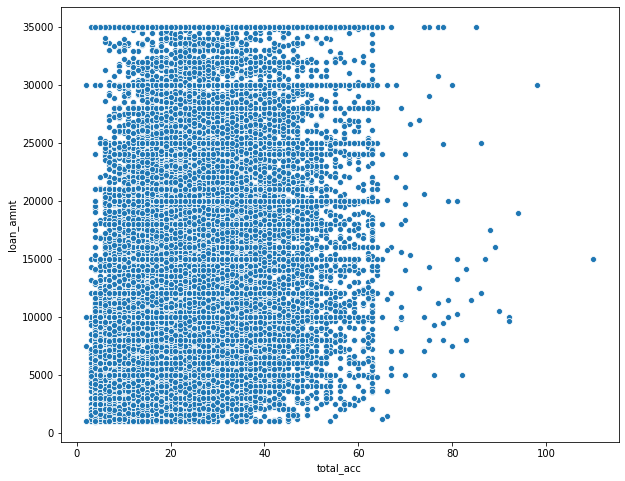

In [300]:
plt.figure(figsize=(10,8))
sns.scatterplot(default_group['total_acc'].sort_values(),default_group['loan_amnt'])

Most of the defaulters had line of credits between 0-50.

Let's analyze the verification status

In [301]:
data1['verification_status'].value_counts()

Source Verified    318178
Verified           280049
Not Verified       257742
Name: verification_status, dtype: int64

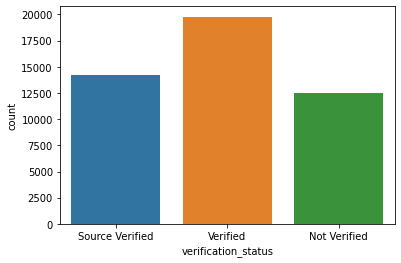

In [302]:
sns.countplot(default_group['verification_status'])

Most of the defaulters were verified,which is explainable as no bank gives loan without verifying.

# CLEANING DATA FOR MODELLING

In [303]:
check_missing_data(data1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
Total,0,0,0,0,0,0,0,0,0,0,49443,43061,0,0,0,0,0,734157,0,33,0,0,0,0,0,0,439812,724785,0,0,0,446,0,0,0,0,0,0,0,0,0,0,0,8862,0,252971,50,56,642830,0,0,855527,855529,855527,0,67313,67313,842681,842681,842681,842681,843035,842681,844360,842681,842681,842681,842681,67313,842681,842681,842681,0
Percent,0,0,0,0,0,0,0,0,0,0,5.77626,5.03067,0,0,0,0,0,85.7691,0,0.00385528,0,0,0,0,0,0,51.3818,84.6742,0,0,0,0.0521047,0,0,0,0,0,0,0,0,0,0,0,1.03532,0,29.5538,0.00584133,0.00654229,75.0997,0,0,99.9484,99.9486,99.9484,0,7.86395,7.86395,98.4476,98.4476,98.4476,98.4476,98.489,98.4476,98.6438,98.4476,98.4476,98.4476,98.4476,7.86395,98.4476,98.4476,98.4476,0
Types,int32,int32,int32,int32,float32,object,float32,float32,object,object,object,object,object,float32,object,object,object,object,object,object,object,object,float32,int8,object,int8,float32,float32,int8,int8,int32,float32,int16,object,float32,float32,float32,float32,float32,float32,float32,float32,float32,object,float32,object,object,float32,float32,int8,object,float32,float32,object,int8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int8


Removing columns with more than 70% of missing data also the columns of no use.

In [304]:
data1.shape

(855969, 73)

In [0]:
data_new = data1.drop(['id','member_id','desc','mths_since_last_record','mths_since_last_major_derog','annual_inc_joint','dti_joint','verification_status_joint','open_acc_6m','open_il_6m','open_il_12m','policy_code','open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','inq_fi','total_cu_tl','inq_last_12m'],axis=1)

In [306]:
data_new.shape

(855969, 50)

# Filling in the missing data

In [0]:
data_new['mths_since_last_delinq'].fillna(0,inplace = True)
data_new['next_pymnt_d'].fillna("00-00-0000",inplace = True)
data_new['mths_since_last_delinq'].fillna(0,inplace = True)

### filling the defaulters data and dropping the non defaulters null value.

In [308]:
data_newgroup = data_new.groupby('default_ind')
data_1 = data_newgroup.get_group(1)
data_0 = data_newgroup.get_group(0)
print(data_1['default_ind'].value_counts())

1    46467
Name: default_ind, dtype: int64


In [309]:
len(data1[data1['tot_coll_amt']==0])

677062

In [0]:
data_1['tot_coll_amt'].fillna(0,inplace = True)
data_1['tot_cur_bal'].fillna(0,inplace = True)
data_1['total_rev_hi_lim'].fillna(0,inplace = True)

In [0]:
data_1.dropna(axis=0,inplace=True)

In [0]:
data_0.dropna(axis=0,inplace=True)

In [313]:
data_new1 = pd.concat([data_1,data_0])
print(data_1.shape)
print(data_0.shape)
print(data_new1.shape)
print(data_new.shape)

(42375, 50)
(701197, 50)
(743572, 50)
(855969, 50)


In [314]:
check_missing_data(data_new1)

False

# Feature selection

In [0]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder

In [0]:
data_enc = data_new1.apply(LabelEncoder().fit_transform)

In [0]:
x = data_enc.drop('default_ind',axis=1)
y = data_enc['default_ind']

In [0]:
etr = ExtraTreesClassifier().fit(x,y)

In [319]:
print(etr.feature_importances_)

[2.48341463e-02 3.19550563e-02 2.73516074e-02 1.71562317e-02
 5.83612117e-03 2.70614348e-02 3.76455761e-03 5.16980904e-03
 1.05775176e-03 9.57945392e-04 1.08846367e-03 1.68424617e-03
 1.67588642e-03 2.98829708e-03 0.00000000e+00 1.59800157e-03
 3.04182559e-03 1.04632058e-03 9.82077938e-04 1.44123951e-03
 6.74859613e-04 1.02662572e-03 1.09019668e-03 9.24281066e-04
 1.15978399e-03 6.13859296e-04 2.05181598e-03 1.37964259e-03
 1.10482913e-03 4.29631099e-03 4.33207582e-02 3.94058269e-02
 4.56794561e-02 4.74326646e-02 1.02323178e-01 1.29729097e-02
 6.98905696e-03 1.53563471e-01 1.33169168e-01 4.84441583e-02
 8.27154254e-02 7.48045590e-02 1.68664578e-02 9.49411122e-05
 3.79696521e-08 5.54912812e-05 5.67178820e-04 7.43851369e-03
 9.14352300e-03]


In [0]:
feature_importances = pd.DataFrame((etr.feature_importances_*100),index = x.columns,columns=['importance']).sort_values('importance',ascending=False)

In [321]:
feature_importances

,importance
recoveries,15.356347
collection_recovery_fee,13.316917
total_rec_prncp,10.232318
last_pymnt_amnt,8.271543
next_pymnt_d,7.480456
last_pymnt_d,4.844416
total_pymnt_inv,4.743266
total_pymnt,4.567946
out_prncp,4.332076
out_prncp_inv,3.940583


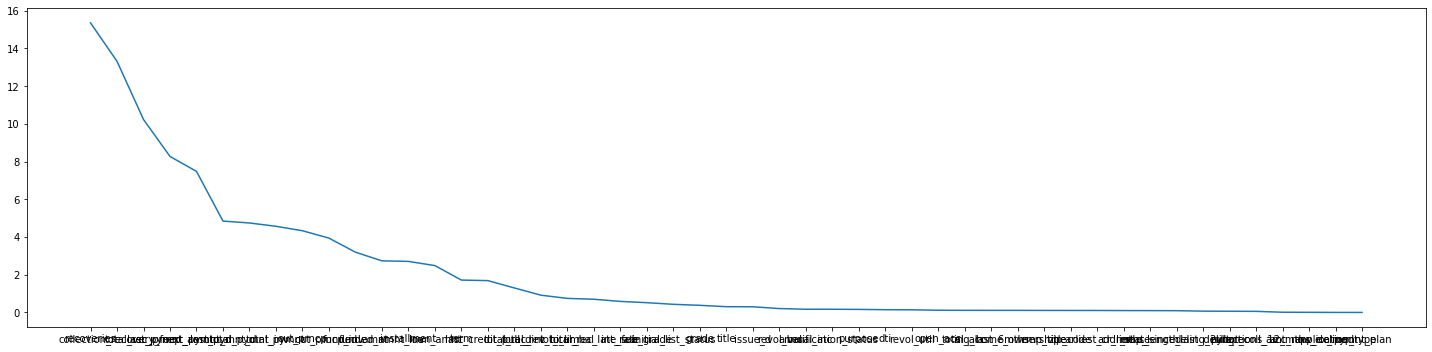

In [322]:
plt.figure(figsize=(20,5))
plt.plot(feature_importances)
plt.tight_layout()

In [323]:
feature_importances[feature_importances['importance']<0.15].index

Index(['dti', 'revol_util', 'open_acc', 'total_acc', 'inq_last_6mths',
       'home_ownership', 'emp_title', 'zip_code', 'earliest_cr_line',
       'addr_state', 'emp_length', 'mths_since_last_delinq', 'delinq_2yrs',
       'pub_rec', 'tot_coll_amt', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'application_type', 'pymnt_plan'],
      dtype='object')

Dropping variables with less than 0.15 feature importance.

In [0]:
data_enc.drop(['dti', 'revol_util', 'open_acc', 'total_acc', 'emp_title', 'zip_code',
       'inq_last_6mths', 'earliest_cr_line', 'addr_state', 'home_ownership',
       'emp_length', 'mths_since_last_delinq', 'delinq_2yrs', 'pub_rec',
       'tot_coll_amt', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'application_type', 'pymnt_plan'],axis=1,inplace =True)

In [329]:
print(data_new1.shape)
print(data_enc.shape)

(743572, 50)
(743572, 31)


# Applying Supervised Learning on the new data with only important features

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_auc_score,roc_curve

In [331]:
data_enc.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'annual_inc',
       'verification_status', 'issue_d', 'purpose', 'title', 'revol_bal',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'tot_cur_bal', 'total_rev_hi_lim', 'default_ind'],
      dtype='object')

In [0]:
X = data_enc.drop('default_ind',axis=1)
Y = data_enc['default_ind']

In [0]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.1,random_state = 200)

In [334]:
print(x_test.shape)
print(y_test.shape)

(74358, 30)
(74358,)


## Logistic Regression

In [0]:
Log_model = LogisticRegression().fit(x_train,y_train)
Logtrainpred = Log_model.predict(x_train)
Log_pred = Log_model.predict(x_test)

Train accuracy

In [336]:
print(confusion_matrix(y_train,Logtrainpred))
print( )
print("accuracy of the model is {} .".format(accuracy_score(y_train,Logtrainpred)))
print( )
print("F1_score of the model on train is {}.".format(f1_score(y_train,Logtrainpred)))

[[630603    425]
 [  2942  35244]]

accuracy of the model is 0.9949687245036715 .

F1_score of the model on train is 0.9544106695552096.


Test accuaracy

[[70117    52]
 [  331  3858]]

accuracy of the model is 0.9948492428521477 .

F1_score of the model on train is 0.9527102111371775.

ROC-AUC is :-
roc_auc_score of Logistic Regression:  0.960121230147693


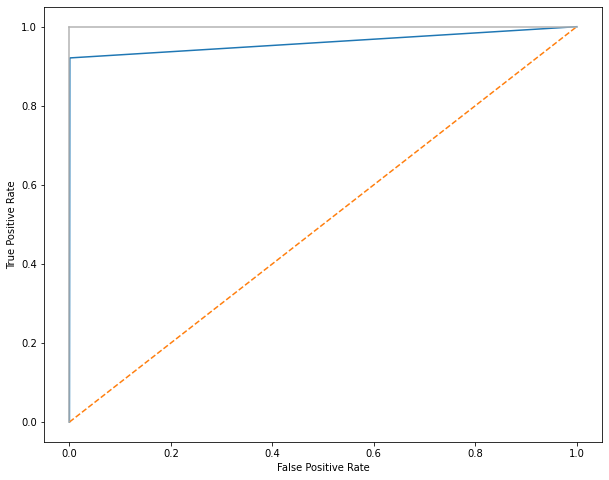

In [337]:
print(confusion_matrix(y_test,Log_pred))
print( )
print("accuracy of the model is {} .".format(accuracy_score(y_test,Log_pred)))
print( )
print("F1_score of the model on train is {}.".format(f1_score(y_test,Log_pred)))
print( )
print("ROC-AUC is :-")
fpr_log,tpr_log,thres_log = roc_curve(y_test,Log_pred)
print("roc_auc_score of Logistic Regression: ",roc_auc_score(y_test,Log_pred))
plt.figure(figsize=(10,8))
plt.plot(fpr_log,tpr_log)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7")
plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## ExtraTreeClassifier

In [0]:
etr_model = ExtraTreesClassifier().fit(x_train,y_train)
etrtrainpred = etr_model.predict(x_train)
etr_pred = etr_model.predict(x_test)

Train accuracy

In [339]:
print(confusion_matrix(y_train,etrtrainpred))
print( )
print("accuracy of the model is {} .".format(accuracy_score(y_train,etrtrainpred)))
print( )
print("F1_score of the model on train is {}.".format(f1_score(y_train,etrtrainpred)))

[[631028      0]
 [     0  38186]]

accuracy of the model is 1.0 .

F1_score of the model on train is 1.0.


Test accuracy

[[70169     0]
 [   40  4149]]

accuracy of the model is 0.9994620619166734 .

F1_score of the model on train is 0.9952026864955624.

ROC_AUC of ExtraTree Classifier :-
roc_auc_score is:  0.9952255908331344


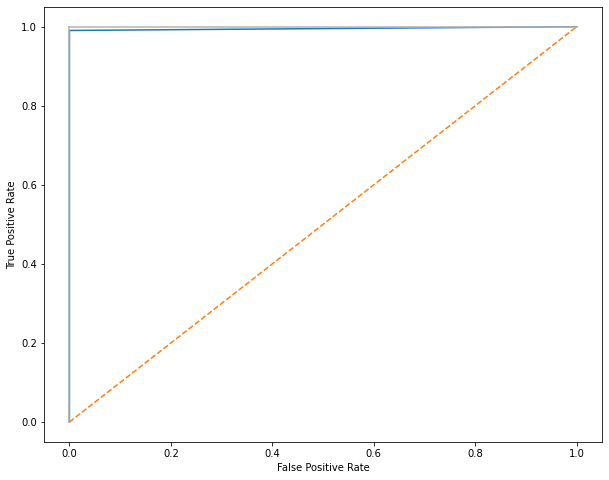

In [340]:
print(confusion_matrix(y_test,etr_pred))
print( )
print("accuracy of the model is {} .".format(accuracy_score(y_test,etr_pred)))
print( )
print("F1_score of the model on train is {}.".format(f1_score(y_test,etr_pred)))
print( )
print("ROC_AUC of ExtraTree Classifier :-")
fpr_etr,tpr_etr,thres_etr=roc_curve(y_test,etr_pred)
print("roc_auc_score is: ", roc_auc_score(y_test,etr_pred))
plt.figure(figsize=(10,8))
plt.plot(fpr_etr,tpr_etr)
plt.plot([0,1],ls = "--")
plt.plot([0,0],[1,0],c="0.7")
plt.plot([1,1],c="0.7")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## RandomForestClassifier

In [0]:
rnd_model = RandomForestClassifier().fit(x_train,y_train)
rndtrainpred = rnd_model.predict(x_train)
rnd_pred = rnd_model.predict(x_test)

train accuracy

In [342]:
print(confusion_matrix(y_train,rndtrainpred))
print( )
print("accuracy of the model is {} .".format(accuracy_score(y_train,rndtrainpred)))
print( )
print("F1_score of the model on train is {}.".format(f1_score(y_train,rndtrainpred)))

[[631028      0]
 [     0  38186]]

accuracy of the model is 1.0 .

F1_score of the model on train is 1.0.


test accuracy

[[70169     0]
 [   32  4157]]

accuracy of the model is 0.9995696495333387 .

F1_score of the model on train is 0.9961658279415287.

ROC_AUC of RandomForest Classifier is: 
roc_auc_score is :  0.9961804726665076


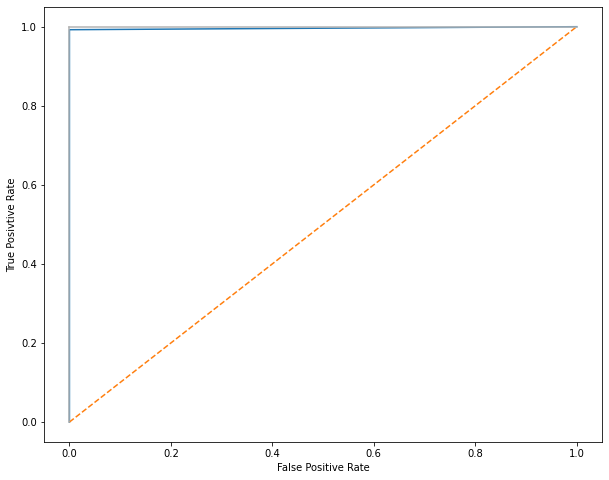

In [343]:
print(confusion_matrix(y_test,rnd_pred))
print( )
print("accuracy of the model is {} .".format(accuracy_score(y_test,rnd_pred)))
print( )
print("F1_score of the model on train is {}.".format(f1_score(y_test,rnd_pred)))
print( )
print("ROC_AUC of RandomForest Classifier is: ")
fpr_rnd,tpr_rnd,thres_rnd = roc_curve(y_test,rnd_pred)
print("roc_auc_score is : ",roc_auc_score(y_test,rnd_pred))
plt.figure(figsize = (10,8))
plt.plot(fpr_rnd,tpr_rnd)
plt.plot([0,1],ls = "--")
plt.plot([0,0],[1,0], c = "0.7")
plt.plot([1,1],c="0.7")
plt.xlabel("False Positive Rate")
plt.ylabel("True Posivtive Rate")
plt.show()

## DecisionTree

In [0]:
tree_model = DecisionTreeClassifier().fit(x_train,y_train)
treetrainpred = tree_model.predict(x_train)
tree_pred = tree_model.predict(x_test)

Train accuracy

In [345]:
print(confusion_matrix(y_train,treetrainpred))
print( )
print("accuracy of the model is {} .".format(accuracy_score(y_train,treetrainpred)))
print( )
print("F1_score of the model on train is {}.".format(f1_score(y_train,treetrainpred)))

[[631028      0]
 [     0  38186]]

accuracy of the model is 1.0 .

F1_score of the model on train is 1.0.


Test accuracy

[[70146    23]
 [   32  4157]]

accuracy of the model is 0.9992603351354259 .

F1_score of the model on train is 0.9934281276138128.

ROC_AUC of DecisionTree Classifier :
roc_auc_score is :  0.9960165826295968


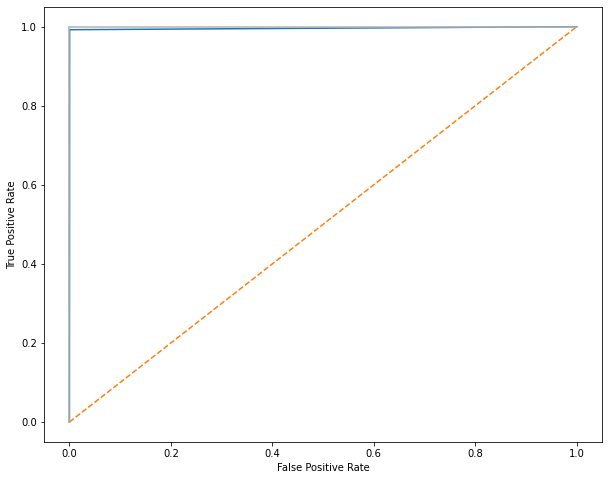

In [346]:
print(confusion_matrix(y_test,tree_pred))
print( )
print("accuracy of the model is {} .".format(accuracy_score(y_test,tree_pred)))
print( )
print("F1_score of the model on train is {}.".format(f1_score(y_test,tree_pred)))
print( )
print("ROC_AUC of DecisionTree Classifier :")
fpr_tree,tpr_tree,thres_tree = roc_curve(y_test,tree_pred)
print("roc_auc_score is : ",roc_auc_score(y_test,tree_pred))
plt.figure(figsize=(10,8))
plt.plot(fpr_tree,tpr_tree)
plt.plot([0,1],ls="--")
plt.plot([0,0],[1,0],c="0.7")
plt.plot([1,1],c="0.7")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## XGBoost

In [0]:
xgb_model = XGBClassifier().fit(x_train,y_train)
xgbtrainpred = xgb_model.predict(x_train)
xgb_pred = xgb_model.predict(x_test)

Train accuracy

In [348]:
print(confusion_matrix(y_train,xgbtrainpred))
print( )
print("accuracy of the model is {} .".format(accuracy_score(y_train,xgbtrainpred)))
print( )
print("F1_score of the model on train is {}.".format(f1_score(y_train,xgbtrainpred)))

[[631027      1]
 [   471  37715]]

accuracy of the model is 0.9992946949705177 .

F1_score of the model on train is 0.993781455034123.


Test accuracy

[[70169     0]
 [   64  4125]]

accuracy of the model is 0.9991392990666774 .

F1_score of the model on train is 0.9923021409670435.

ROC_AUC of XGBoost : 
roc_auc_score is :  0.9923609453330151


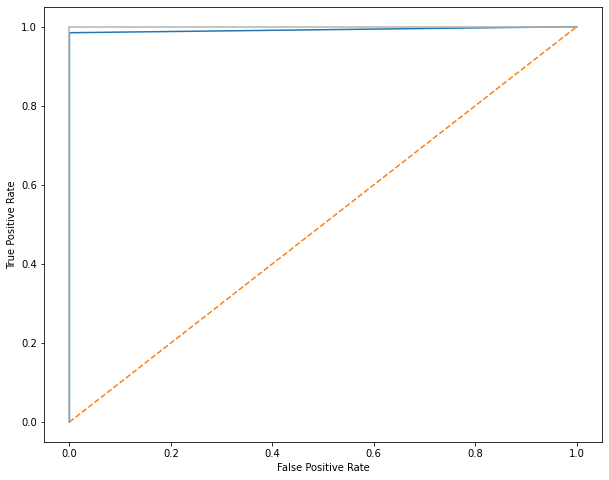

In [349]:
print(confusion_matrix(y_test,xgb_pred))
print( )
print("accuracy of the model is {} .".format(accuracy_score(y_test,xgb_pred)))
print( )
print("F1_score of the model on train is {}.".format(f1_score(y_test,xgb_pred)))
print( )
print("ROC_AUC of XGBoost : ")
fpr_xgb,tpr_xgb,thres_xgb = roc_curve(y_test,xgb_pred)
print("roc_auc_score is : ",roc_auc_score(y_test,xgb_pred))
plt.figure(figsize=(10,8))
plt.plot(fpr_xgb,tpr_xgb)
plt.plot([0,1],ls="--")
plt.plot([0,0],[1,0],c="0.7")
plt.plot([1,1],c="0.7")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

Test on random sample from the data.

In [350]:
x_test.shape

(74358, 30)

In [0]:
sample_data = data_enc.sample(74358)

In [352]:
data_enc.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,annual_inc,verification_status,issue_d,purpose,title,revol_bal,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,tot_cur_bal,total_rev_hi_lim,default_ind
1,61,61,219,1,247,1142,2,13,3005,1,96,0,30218,1687,0,0,0,35861,37402,17303,37608,0,1443,190,27,6940,0,55,0,0,1
9,176,176,517,1,154,4433,1,9,242,2,96,9,2903,9279,0,0,0,53530,55708,26995,46141,0,2744,749,82,7052,0,17,0,0,1
12,321,321,863,0,182,17465,2,10,3005,1,96,2,33722,10452,0,0,0,81461,85089,50845,49324,0,4275,1527,50,21285,0,68,0,0,1
14,361,361,965,0,94,19135,1,6,31742,1,96,9,22131,11997,0,0,0,217127,224006,158183,114294,0,6069,2585,75,23044,0,18,0,0,1
21,801,801,1819,0,147,46994,1,8,32799,2,96,2,9219,32126,0,0,0,316825,324238,208457,211528,0,0,0,67,52167,0,6,0,0,1


In [353]:
sample_data.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,annual_inc,verification_status,issue_d,purpose,title,revol_bal,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,tot_cur_bal,total_rev_hi_lim,default_ind
236490,361,361,965,0,43,18184,0,4,21450,0,90,1,8194,11807,1,78394,80697,136651,142308,116437,63998,0,0,0,93,22050,2,6,129053,3389,0
769828,681,681,1599,0,13,37007,0,2,17611,0,31,2,10723,12697,0,150100,157714,159804,166015,135619,68903,0,0,0,7,41718,2,6,20084,4037,0
428374,961,961,2082,0,133,53366,1,7,27548,1,14,1,8194,25353,0,121727,126851,354624,362031,221370,230279,0,0,0,93,59032,2,6,57045,10355,0
754158,961,961,2085,1,103,36276,1,8,29027,1,31,4,16215,12623,1,198500,210968,157453,163606,106005,149885,0,0,0,7,40962,2,6,56269,10435,0
551351,524,524,1274,1,333,22093,4,21,6273,1,82,2,10723,11347,1,148440,155917,35404,36913,16498,48359,0,0,0,7,26171,2,6,97440,1953,0


In [0]:
x_sample = sample_data.drop('default_ind',axis=1)
y_sample = sample_data['default_ind']

In [0]:
Logsample = Log_model.predict(x_sample)
etrsample = etr_model.predict(x_sample)
rndsample = rnd_model.predict(x_sample)
treesample = tree_model.predict(x_sample)
xgbsample = xgb_model.predict(x_sample)

In [356]:
print("F1 score of Logistic Regression is {} .".format(f1_score(y_sample,Logsample)))
print()
print("F1 score of ExtraTree Classifier is {} .".format(f1_score(y_sample,etrsample)))
print()
print("F1 score of RandomForest Classifier is {} .".format(f1_score(y_sample,rndsample)))
print()
print("F1 score of DecisionTree Classifier is {} .".format(f1_score(y_sample,treesample)))
print()
print("F1 score of XGBoost is {} .".format(f1_score(y_sample,xgbsample)))

F1 score of Logistic Regression is 0.9556505803298718 .

F1 score of ExtraTree Classifier is 0.9994082139898214 .

F1 score of RandomForest Classifier is 0.9995266272189349 .

F1 score of DecisionTree Classifier is 0.9996450124245652 .

F1 score of XGBoost is 0.9941715237302248 .


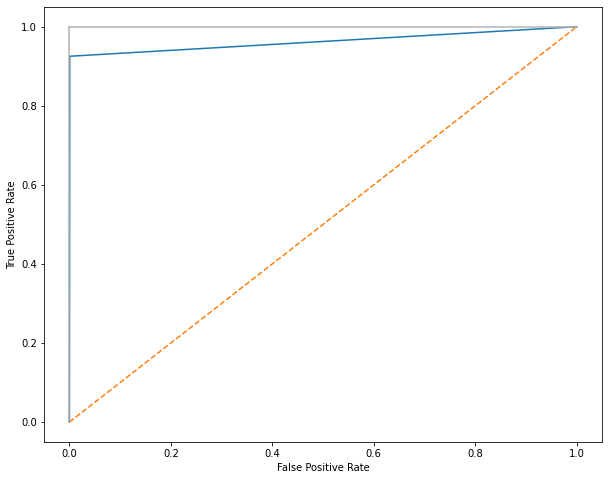

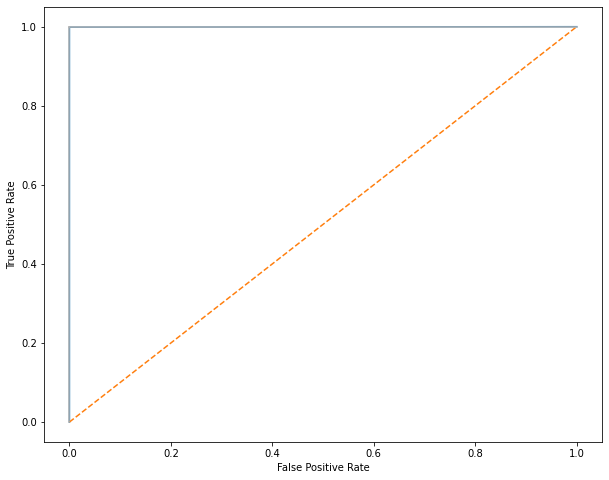

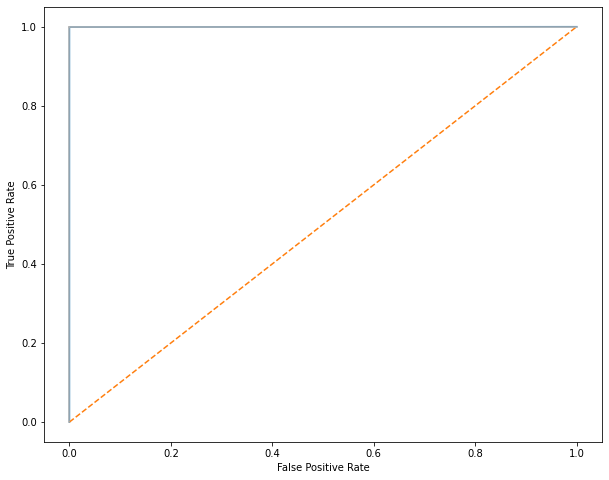

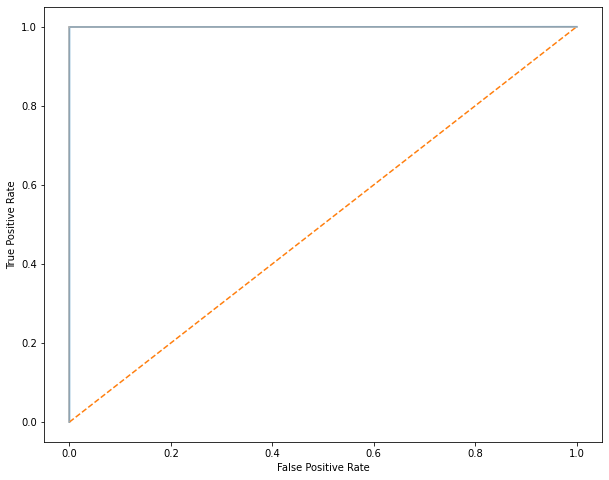

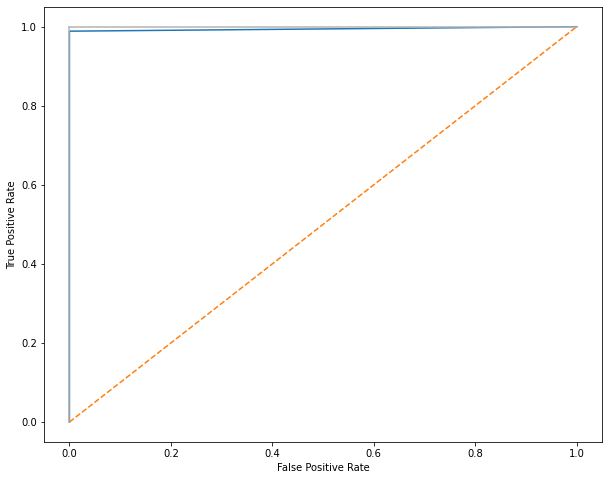

In [357]:
for i in [Logsample,etrsample,rndsample,treesample,xgbsample]:
  fpr,tpr,thres = roc_curve(y_sample,i)
  plt.figure(figsize=(10,8))
  plt.plot(fpr,tpr,label="{}, AUC={:.3f}")
  plt.plot([0,1],ls='--')
  plt.plot([0,0],[1,0],c="0.7")
  plt.plot([1,1],c="0.7")
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.show()